<a href="https://colab.research.google.com/github/kamjelonek/Project_2_CLASS/blob/main/driver_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN, KMeansSMOTE
from sklearn.manifold import TSNE, Isomap
from sklearn.linear_model import RidgeClassifier
from sklearn.inspection import permutation_importance
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D, axes3d

# Functions

In [50]:
def Feature_3D(X,y,a,b,c,tit,T):

  model_tsne = TSNE(n_components=3)

  X_show = np.array(X)
  y_show = np.array(y)

  if T == "tsne":
    X_show = model_tsne.fit_transform(X_show)

  figure = plt.figure(figsize=(8,8))
  ax = Axes3D(figure, elev=48, azim=134)
  ax = plt.axes(projection='3d')

  mask = y_show == 0

  ax.scatter(X_show[mask, a], X_show[mask, b], X_show[mask, c],c='#00A36C', edgecolor="k",label='Drowsy')
  ax.scatter(X_show[~mask, a], X_show[~mask, b], X_show[~mask, c],c='#DE3163', edgecolor="k", marker='^',label='Awake')
  ax.set_xlabel(f'Feature {a}')
  ax.set_ylabel(f'Feature {b}')
  ax.set_zlabel(f'Feature {c}')
  ax.set_title(tit)
  ax.legend(loc='best')
  return plt.show()

In [52]:
def Feature_2D(X,y,a,b,tit,T):

  model_tsne = TSNE(n_components=2)

  X_show = np.array(X)
  y_show = np.array(y)

  if T == "tsne":
    X_show=model_tsne.fit_transform(X_show)

  X_show = np.array(X)
  y_show = np.array(y)

  mask = y_show == 0

  plt.figure(figsize=(8,8))
  plt.scatter(X_show[mask,a],X_show[mask,b],c='#00A36C',label='Drowsy',edgecolor="k")
  plt.scatter(X_show[~mask,a],X_show[~mask,b],c='#DE3163',label='Awake',marker='^',edgecolor="k")
  plt.title(tit)
  plt.legend(loc='best')
  plt.show()

In [5]:
def Matrix_Curve(model,X,y,model_name,matrix):

  train_sizes, train_scores, test_scores = learning_curve(model,X,y,
                                                          cv=10, scoring='f1_macro',
                                                          train_sizes=np.linspace(0.01, 1.0, 10))

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

  sns.heatmap(matrix, annot=True, cmap=sns.light_palette("seagreen", as_cmap=True), fmt='g', ax=ax1,
              xticklabels=["Positive","Negative"],
              yticklabels=["Positive","Negative"])
  ax1.set_title(f"Confusion Matrix for {str(model_name)}")

  ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
  ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
  ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
  ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
  ax2.set_title(f'Learning Curve for ({str(model_name)})')
  ax2.set_xlabel('Number of Training Examples')
  ax2.set_ylabel('Accuracy')
  ax2.legend(loc='lower right')
  ax2.grid(True)

  plt.show()

In [6]:
def Conf_class(T,P):

  matrix_cl = []

  for x,y in zip(np.array(T),P):
    if x == y:
      matrix_cl.append(x)
    elif x == 0 and x != y:
      matrix_cl.append(3)
    elif x == 1 and x != y:
      matrix_cl.append(4)
  return np.array(matrix_cl)

In [7]:
df = pd.read_csv('acquiredDataset.csv')
df.head()

attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0

In [8]:
df.shape

(3735, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditation      3735 non-null   int64
 2   delta           3735 non-null   int64
 3   theta           3735 non-null   int64
 4   lowAlpha        3735 non-null   int64
 5   highAlpha       3735 non-null   int64
 6   lowBeta         3735 non-null   int64
 7   highBeta        3735 non-null   int64
 8   lowGamma        3735 non-null   int64
 9   highGamma       3735 non-null   int64
 10  classification  3735 non-null   int64
dtypes: int64(11)
memory usage: 321.1 KB


In [10]:
df=df.astype('int32')

In [11]:
df['classification'].unique()

array([0, 1], dtype=int32)

In [12]:
print('Duplicate rows:')
print(df.duplicated().sum())

Duplicate rows:
0


In [13]:
df.nunique()


attention           60
meditation          60
delta             3724
theta             3680
lowAlpha          3601
highAlpha         3561
lowBeta           3573
highBeta          3494
lowGamma          3259
highGamma         3651
classification       2
dtype: int64

In [14]:
nany = df.isna().sum()
print("Cout of missing values:")
print(nany)

Cout of missing values:
attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64


In [15]:
corr = df.drop(columns = ['classification']).corr()
display(corr)

attention  meditation     delta     theta  lowAlpha  highAlpha  \
attention    1.000000    0.012465 -0.142241 -0.053082 -0.051414   0.047367   
meditation   0.012465    1.000000 -0.075071 -0.081029  0.159976   0.015013   
delta       -0.142241   -0.075071  1.000000  0.380921  0.363079   0.257987   
theta       -0.053082   -0.081029  0.380921  1.000000  0.456296   0.656068   
lowAlpha    -0.051414    0.159976  0.363079  0.456296  1.000000   0.256059   
highAlpha    0.047367    0.015013  0.257987  0.656068  0.256059   1.000000   
lowBeta      0.006725    0.009094  0.349557  0.344237  0.693183   0.271657   
highBeta     0.166178    0.027394  0.225820  0.663608  0.437718   0.632582   
lowGamma     0.059002   -0.097699  0.253741  0.285673  0.294094   0.281427   
highGamma    0.032169    0.166853  0.287873  0.594448  0.444335   0.469033   

             lowBeta  highBeta  lowGamma  highGamma  
attention   0.006725  0.166178  0.059002   0.032169  
meditation  0.009094  0.027394 -0.097699   0.166853  
delta       0.349557  0.225820  0.253741   0.287873  
theta       0.344237  0.663608  0.285673   0.594448  
lowAlpha    0.693183  0.437718  0.294094   0.444335  
highAlpha   0.271657  0.632582  0.281427   0.469033  
lowBeta     1.000000  0.199992  0.403545   0.182727  
highBeta    0.199992  1.000000  0.301577   0.650842  
lowGamma    0.403545  0.301577  1.000000   0.027007  
highGamma   0.182727  0.650842  0.027007   1.000000

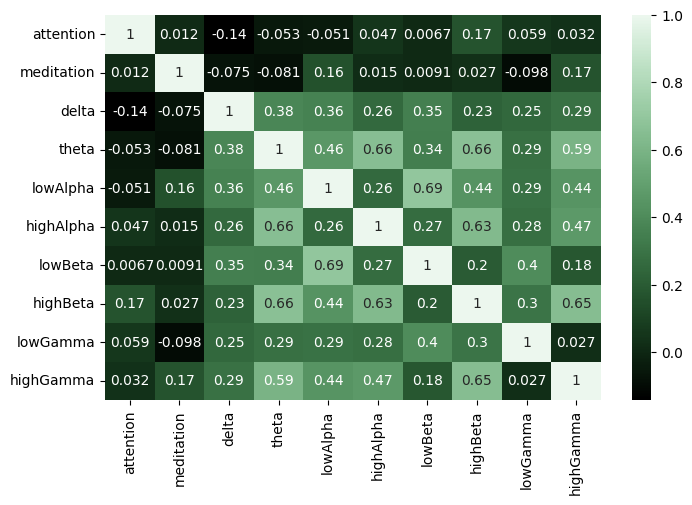

In [16]:
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True,cmap=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True))
plt.show()

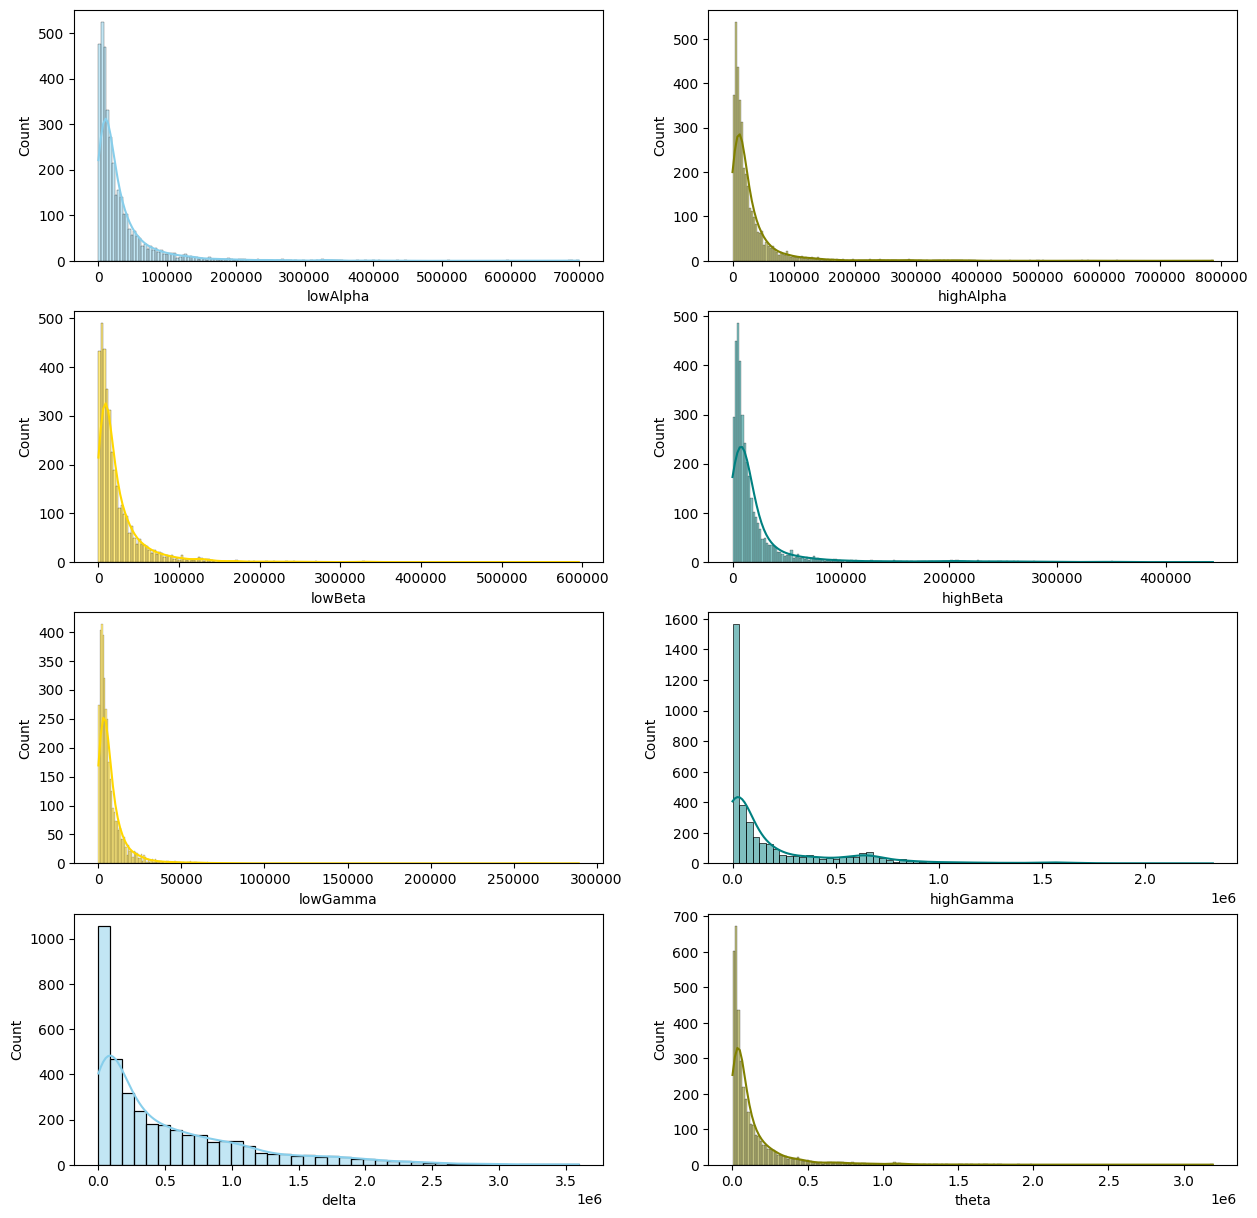

In [17]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

sns.histplot(data=df, x="lowAlpha", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="highAlpha", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="lowBeta", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="highBeta", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="lowGamma", kde=True, color="gold", ax=axs[2, 0])
sns.histplot(data=df, x="highGamma", kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=df, x="delta", kde=True, color="skyblue", ax=axs[3, 0])
sns.histplot(data=df, x="theta", kde=True, color="olive", ax=axs[3, 1])
plt.show()

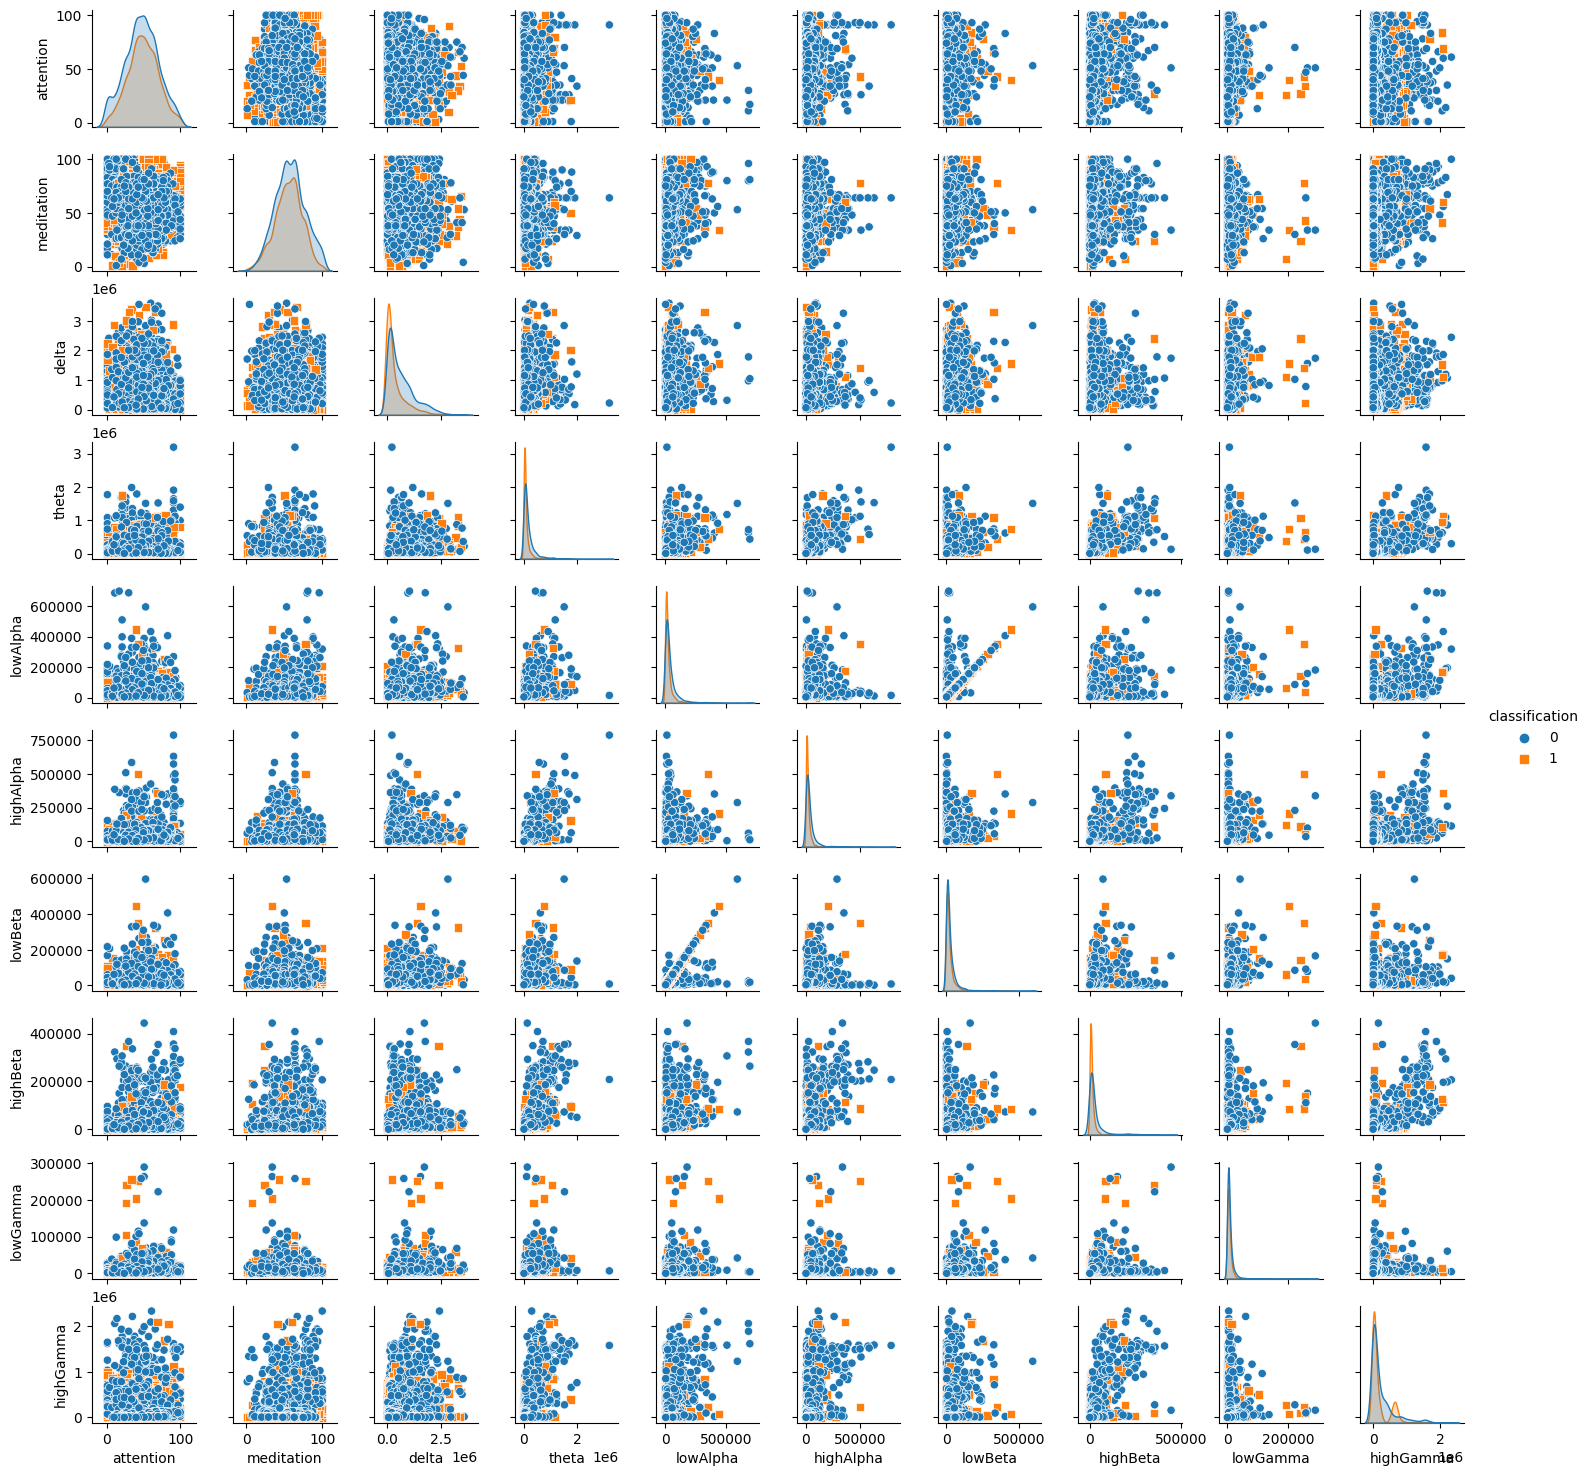

In [18]:
_ = sns.pairplot(df, hue='classification', diag_kind='kde', markers=['o', 's'], height=1.5, aspect=1)

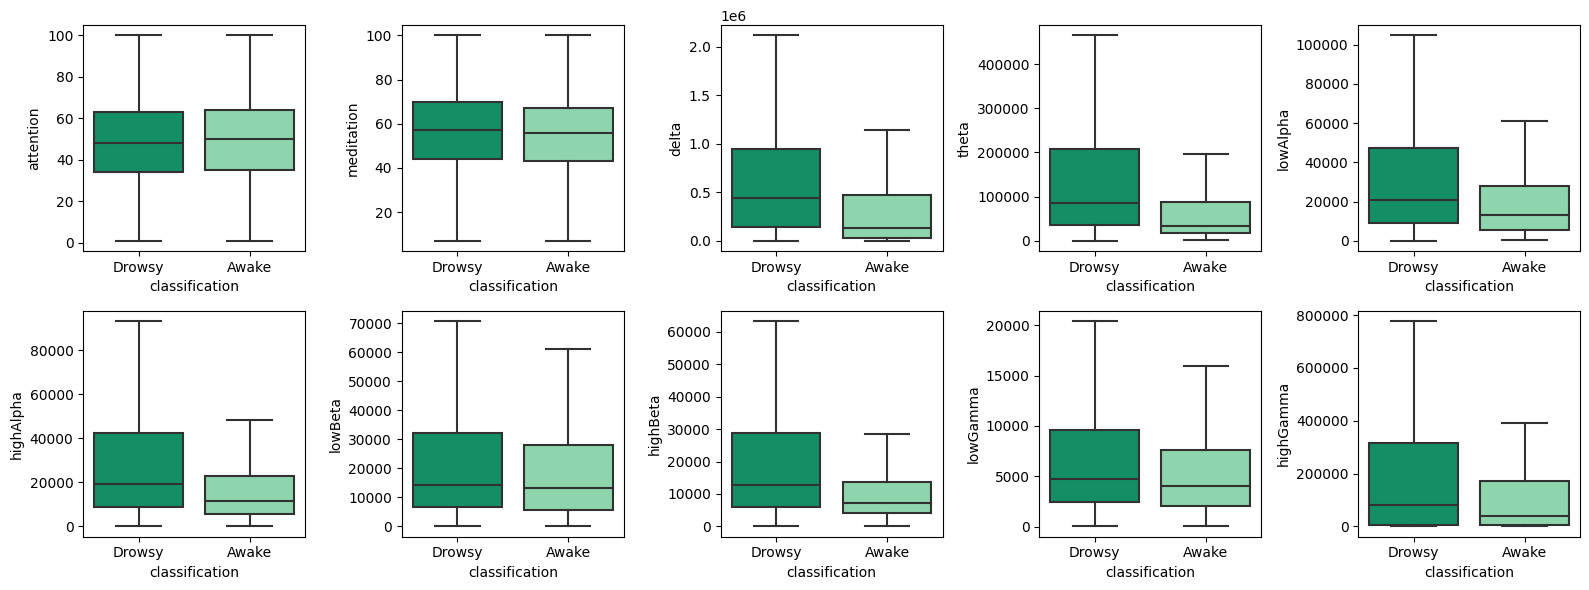

In [19]:
cols = ['attention', 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma', 'highGamma']

rows_plot = 2
cols_plot = 5
counter = 1

plt.rcParams['figure.figsize'] = [16, 6]

for col in cols:
    plt.subplot(rows_plot, cols_plot, counter)
    sns.boxplot(x='classification', y=col, data=df, showfliers=False, palette=['#00A36C', '#82E0AA'])
    plt.xticks([0,1],["Drowsy","Awake"])
    counter += 1

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


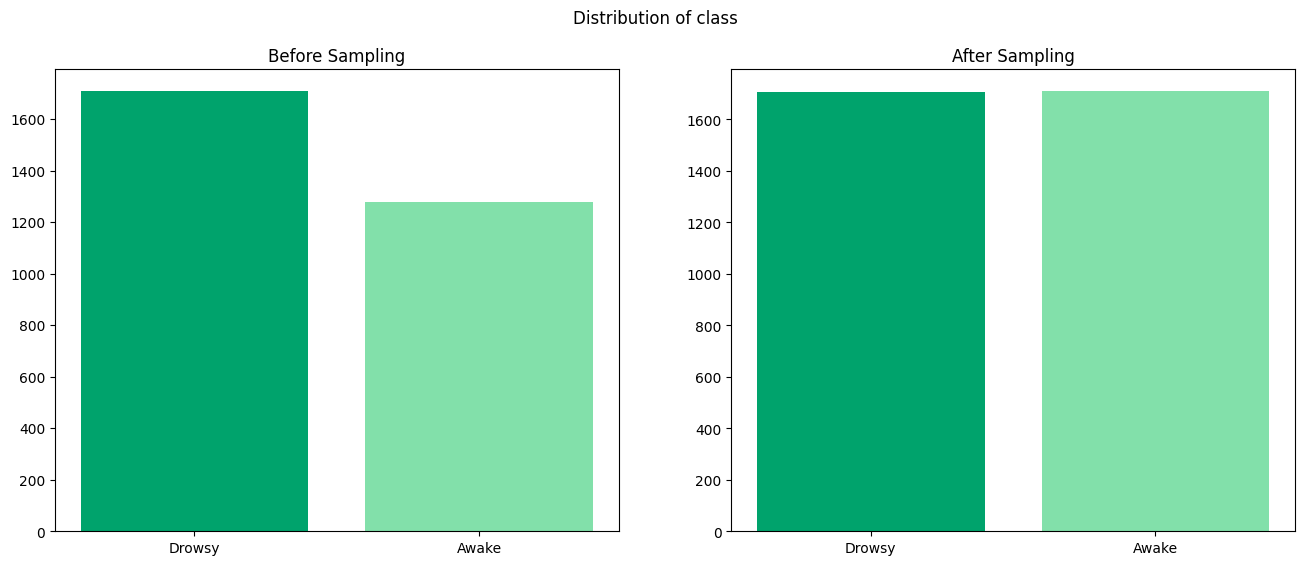

In [20]:
ada = ADASYN(sampling_strategy='minority', random_state=42)
km = KMeansSMOTE(random_state=42)

X = df.drop(columns=['classification', 'attention', 'meditation'])
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
X_train_km, y_train_km = km.fit_resample(X_train, y_train)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Distribution of class")

ax1.bar(y_train.unique(), ((y_train == 0).sum(), (y_train == 1).sum()), color=['#00A36C', '#82E0AA'], tick_label=['Drowsy', 'Awake'])
ax1.set_title("Before Sampling")

ax2.bar(y_train_km.unique(), ((y_train_km == 0).sum(), (y_train_km == 1).sum()), color=['#00A36C', '#82E0AA'], tick_label=['Drowsy', 'Awake'])
ax2.set_title("After Sampling")

plt.show()

In [21]:
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_ada.shape: {X_train_ada.shape}")
print(f"X_test.shape: {X_test.shape}")

results_models = {"accuracy": [],
                  "precision": [],
                  "recall": [],
                  "f1_score": []}

X_train.shape: (2988, 8)
X_train_ada.shape: (3463, 8)
X_test.shape: (747, 8)


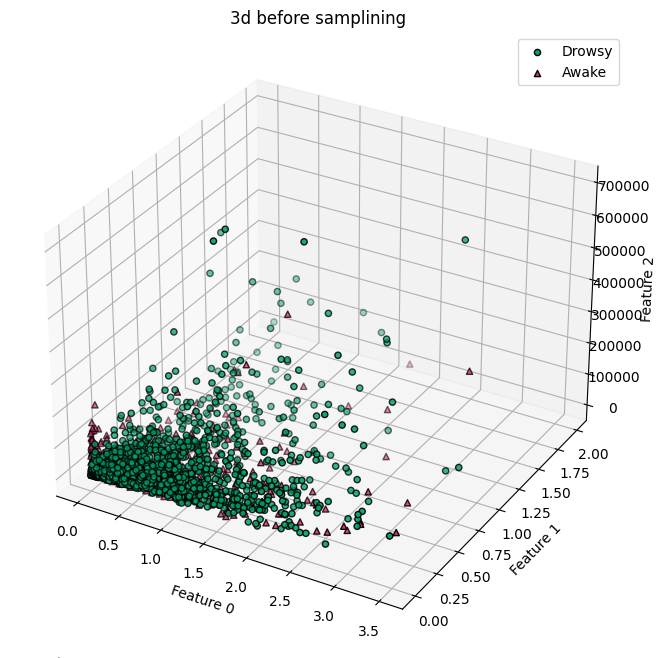

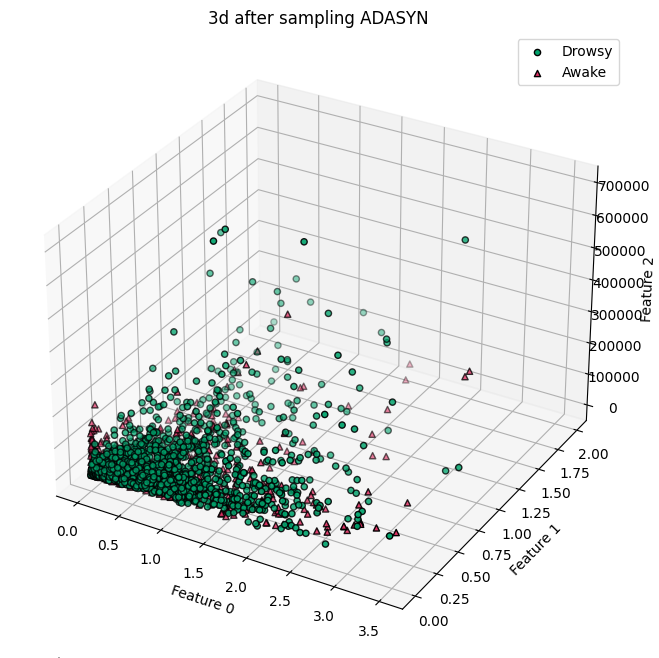

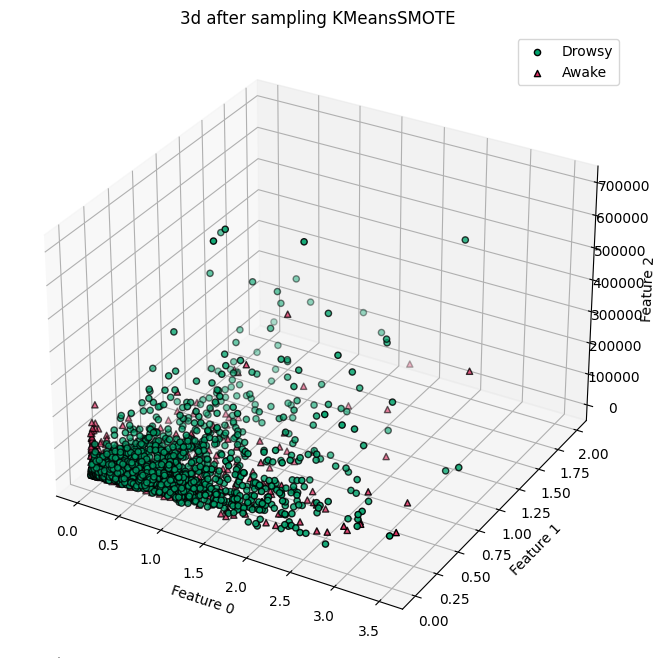

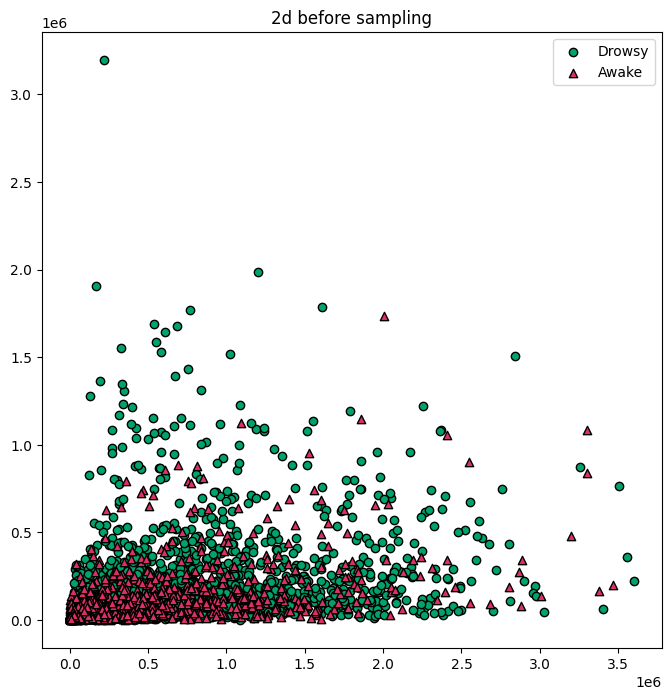

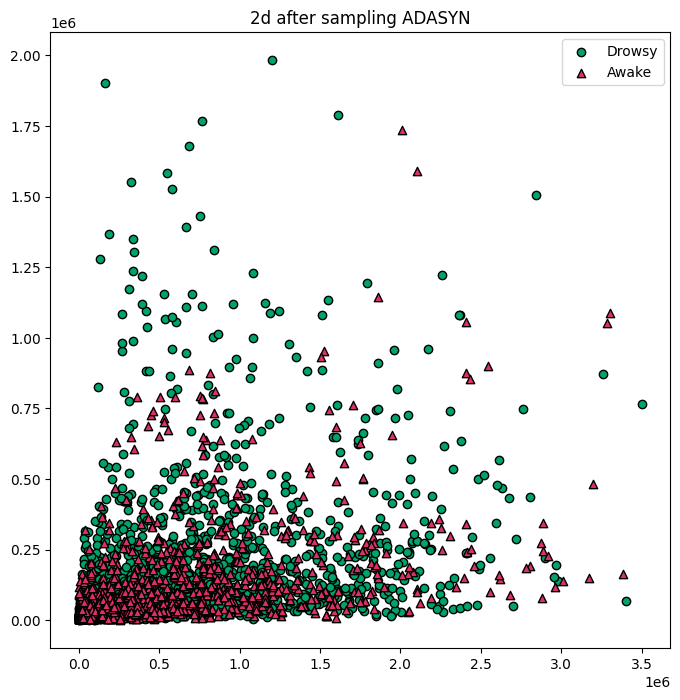

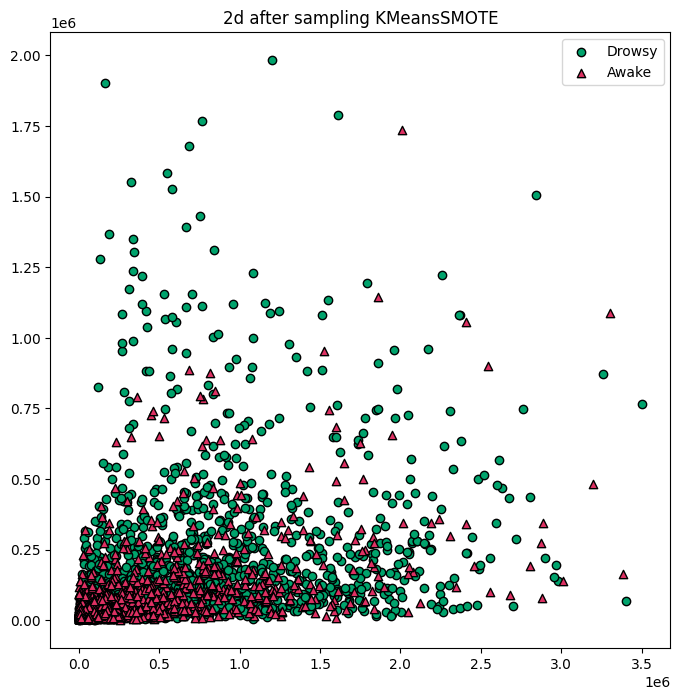

In [53]:
Feature_3D(X_train,y_train,0,1,2,str("3d before samplining"),str("k"))
Feature_3D(X_train_ada,y_train_ada,0,1,2,str("3d after sampling ADASYN"),str("k"))
Feature_3D(X_train_km,y_train_km,0,1,2,str("3d after sampling KMeansSMOTE"),str("k"))
Feature_2D(X,y,0,1,str("2d before sampling"),str("k"))
Feature_2D(X_train_ada,y_train_ada,0,1,str("2d after sampling ADASYN"),str("k"))
Feature_2D(X_train_km,y_train_km,0,1,str("2d after sampling KMeansSMOTE"),str("k"))

# Ridge

In [ ]:
params = {"alpha": [0.000001,0.00001,0.0001,1]}

gs_ridge = GridSearchCV(RidgeClassifier(),
                  param_grid=params,
                  cv=10,
                  scoring="f1_macro")

gs_ridge.fit(X_train_ada,y_train_ada)

print(gs_ridge.best_params_)

{'alpha': 1e-06}


Accuracy score: 0.6211512717536813
Precision score: 0.5352380952380953
Recall score: 0.878125
matt_score: 0.3320790718011234
              precision    recall  f1-score   support

           0       0.82      0.43      0.56       427
           1       0.54      0.88      0.67       320

    accuracy                           0.62       747
   macro avg       0.68      0.65      0.61       747
weighted avg       0.70      0.62      0.61       747



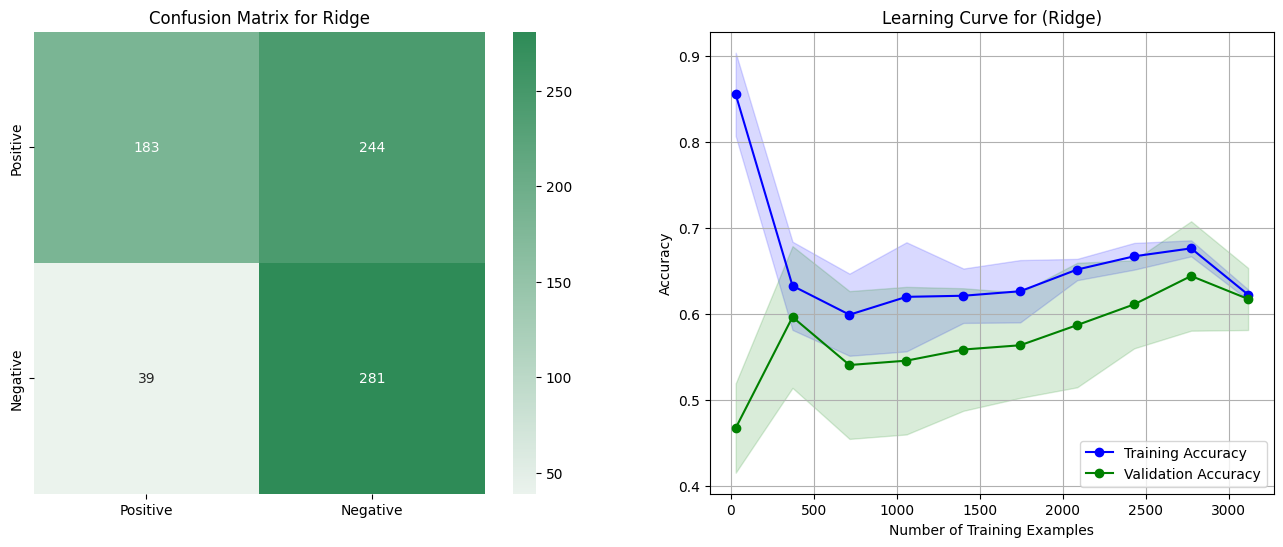

In [ ]:
model_ridge = RidgeClassifier(alpha=gs_ridge.best_params_["alpha"])

model_ridge.fit(X_train_ada,y_train_ada)

y_pred_ridge = model_ridge.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test,y_pred_ridge)}")
print(f"Precision score: {precision_score(y_test,y_pred_ridge)}")
print(f"Recall score: {recall_score(y_test,y_pred_ridge)}")
print(f"matt_score: {matthews_corrcoef(y_test,y_pred_ridge)}")
matrix_ridge = confusion_matrix(y_test,y_pred_ridge)

print(classification_report(y_test,y_pred_ridge))

results_models["accuracy"].append(accuracy_score(y_test,y_pred_ridge))
results_models["precision"].append(precision_score(y_test,y_pred_ridge))
results_models["recall"].append(recall_score(y_test,y_pred_ridge))
results_models["f1_score"].append(f1_score(y_test, y_pred_ridge, average='macro'))

Matrix_Curve(model_ridge,X_train_ada,y_train_ada,str("Ridge"),matrix_ridge)

In [ ]:
conf_class_ridge = Conf_class(y_test, y_pred_ridge)

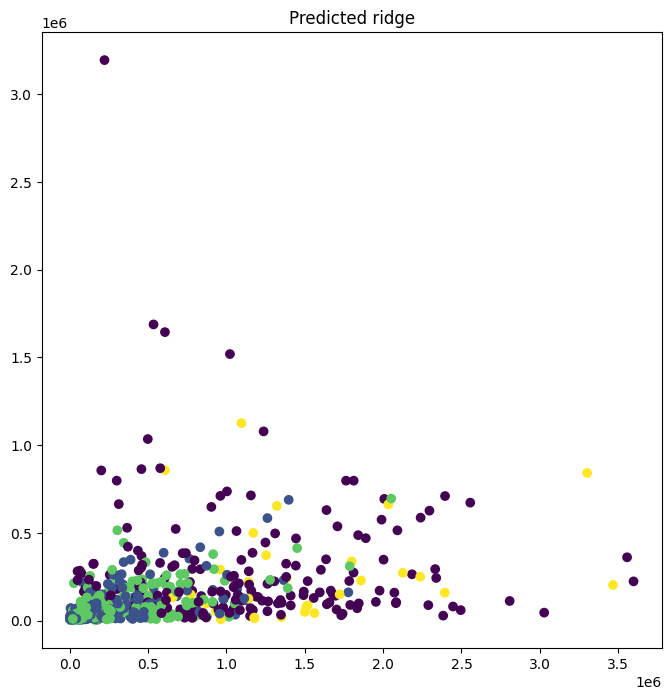

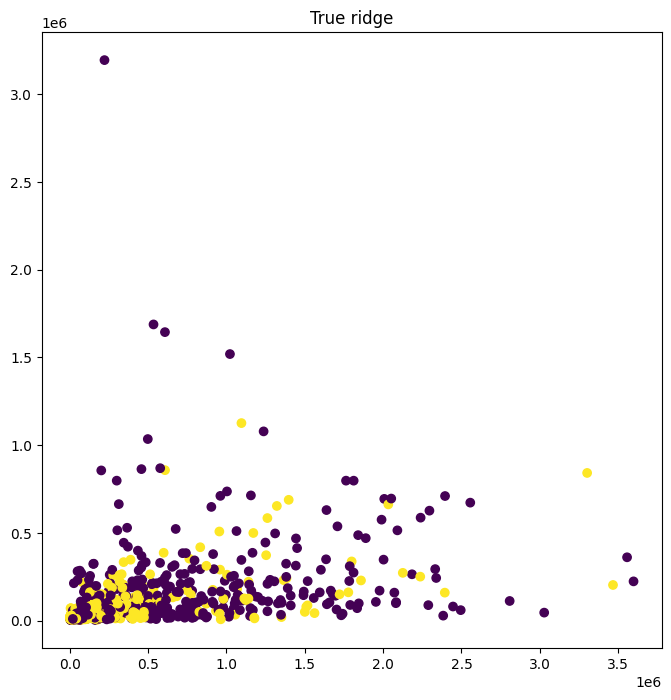

In [ ]:
Feature_2D(X_test,conf_class_ridge,0,1,str("Predicted ridge"),str("k"))
Feature_2D(X_test,y_test,0,1,str("True ridge"),str("k"))


AUC for train: 0.7026248190182616
AUC for test: 0.725548887587822


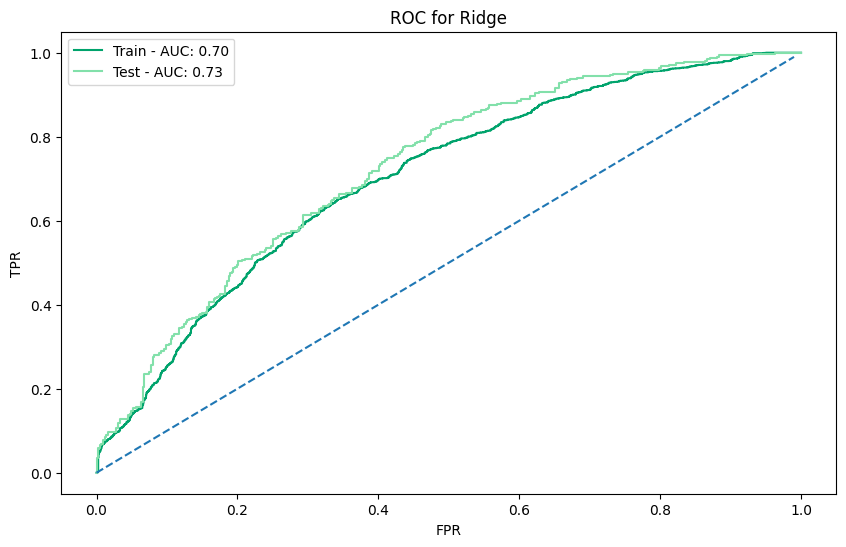

In [ ]:
pred_train_proba_ridge = model_ridge.decision_function(X_train_ada)
pred_test_proba_ridge = model_ridge.decision_function(X_test)

roc_auc_train_ridge = roc_auc_score(y_train_ada, pred_train_proba_ridge)
roc_auc_test_ridge = roc_auc_score(y_test, pred_test_proba_ridge)

print(f"AUC for train: {roc_auc_train_ridge}")
print(f"AUC for test: {roc_auc_test_ridge}")

fpr_train_ridge, tpr_train_ridge, _ = roc_curve(y_train_ada, pred_train_proba_ridge)
fpr_test_ridge, tpr_test_ridge, _ = roc_curve(y_test, pred_test_proba_ridge)

plt.figure(figsize=(10, 6))

plt.plot(fpr_train_ridge, tpr_train_ridge, label=f'Train - AUC: {roc_auc_train_ridge:.2f}',color='#00A36C')
plt.plot(fpr_test_ridge, tpr_test_ridge, label=f'Test - AUC: {roc_auc_test_ridge:.2f}',color='#82E0AA')
plt.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01), '--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for Ridge')
plt.legend()
plt.show()


In [ ]:
X_train.columns

Index(['delta', 'theta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta',
       'lowGamma', 'highGamma'],
      dtype='object')

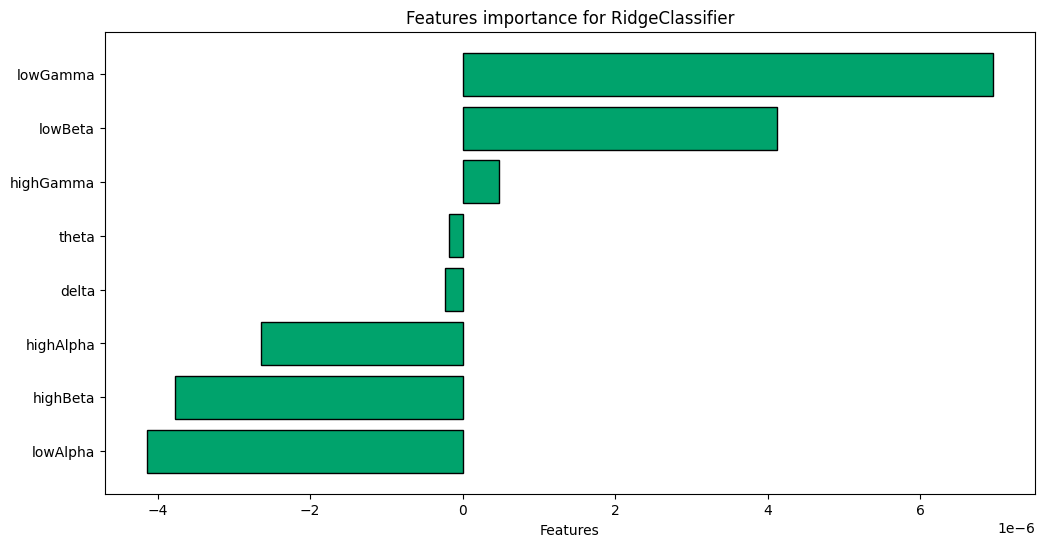

In [ ]:
feature_names = X_train.columns

coefficients = model_ridge.coef_[0]

sorted_idx = np.argsort(coefficients)
sorted_coefficients = coefficients[sorted_idx]
sorted_feature_names = np.array(feature_names)[sorted_idx]

plt.figure(figsize=(12, 6))
plt.barh(sorted_feature_names, sorted_coefficients, align='center',color="#00A36C", edgecolor='black')
plt.xlabel('Features')
plt.title('Features importance for RidgeClassifier')
plt.show()


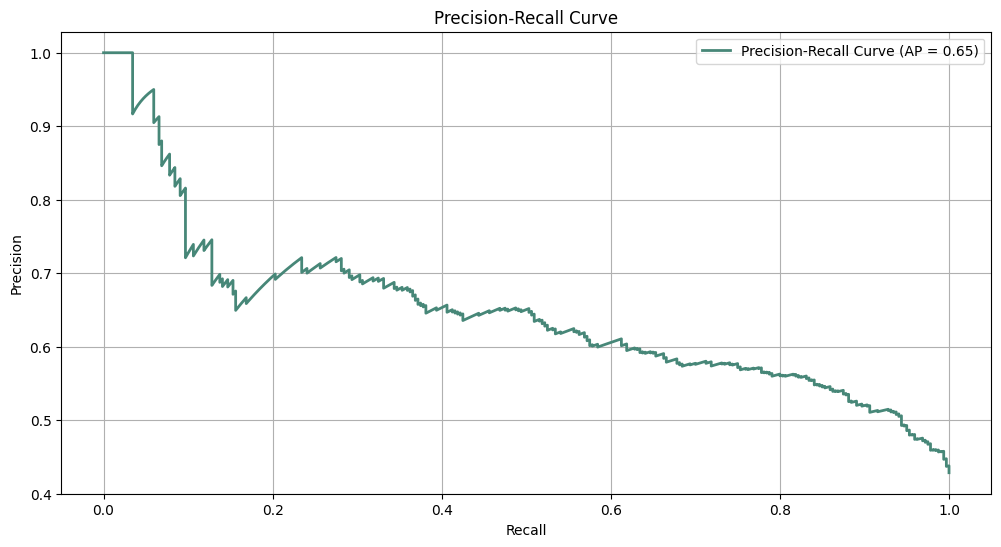

In [ ]:
y_scores = model_ridge.decision_function(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

average_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(12, 6))
plt.plot(recalls, precisions, label=f'Precision-Recall Curve (AP = {average_precision:.2f})', lw=2,color='#478778')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

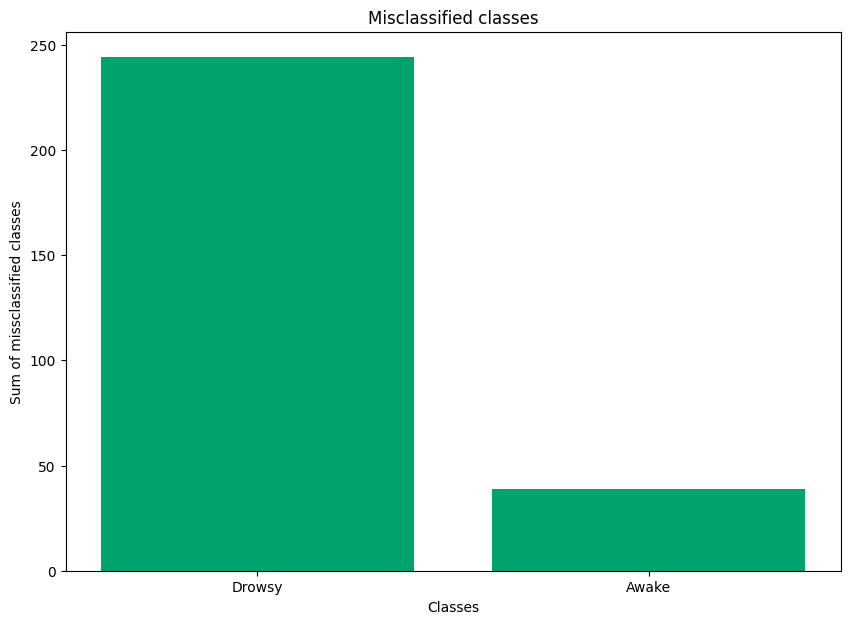

In [ ]:
y_test_array = np.array(y_test)
y_pred_ridge_array = np.array(y_pred_ridge)
unique_classes = np.unique(y_test_array)
bins = np.arange(len(unique_classes) + 1) - 0.5
misclassified_classes = [y_test_array[i] for i in range(len(y_test_array)) if y_test_array[i] != y_pred_ridge_array[i]]

plt.figure(figsize=(10,7))
plt.hist(misclassified_classes, bins=bins, align='mid', rwidth=0.8, color='#00A36C')
plt.title('Misclassified classes')
plt.xlabel('Classes')
plt.ylabel('Sum of missclassified classes')
plt.xticks(ticks=np.arange(len(unique_classes)), labels=["Drowsy","Awake"])
plt.show()

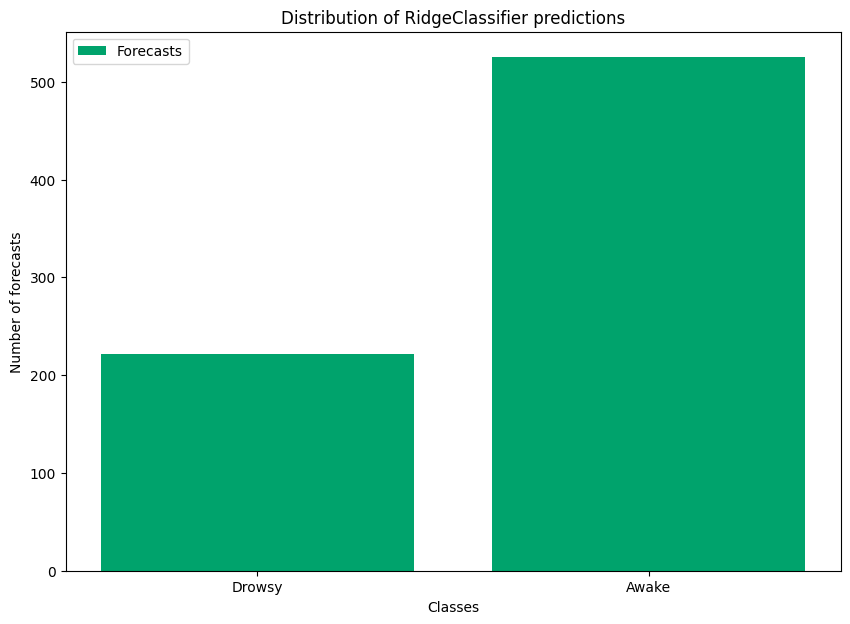

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(y_pred_ridge, bins=np.arange(3) - 0.5, align='mid', rwidth=0.8, color='#00A36C', label='Forecasts')
plt.title('Distribution of RidgeClassifier predictions')
plt.xlabel('Classes')
plt.ylabel('Number of forecasts')
plt.xticks([0,1],["Drowsy","Awake"])
plt.legend()
plt.show()

# KNN

In [ ]:
dims = [2, 3, 4, 5, 6, 7, 8]

for dim in dims:
    if dim != 8:
        model_iso = Isomap(n_components=dim)
        X_train_iso = model_iso.fit_transform(X_train_km)
        X_test_iso = model_iso.transform(X_test)
    else:
        X_train_iso = X_train_km
        X_test_iso = X_test

    params = {
        "n_neighbors": [3, 5, 7, 9, 11],
        "algorithm": ["ball_tree", "kd_tree", "brute"],
        "leaf_size": [15, 30, 45],
        "p": [1, 2]
    }

    gs_km = GridSearchCV(KNeighborsClassifier(),
                         param_grid=params,
                         cv=10,
                         scoring="f1_macro")

    gs_km.fit(X_train_iso, y_train_km)

    y_pred_gs = gs_km.predict(X_test_iso)
    print(f"Class report for {dim}D:\n{classification_report(y_test, y_pred_gs)}")

Class report for 2D:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       427
           1       0.68      0.68      0.68       320

    accuracy                           0.73       747
   macro avg       0.72      0.72      0.72       747
weighted avg       0.73      0.73      0.73       747

Class report for 3D:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       427
           1       0.66      0.68      0.67       320

    accuracy                           0.71       747
   macro avg       0.71      0.71      0.71       747
weighted avg       0.71      0.71      0.71       747

Class report for 4D:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       427
           1       0.64      0.70      0.67       320

    accuracy                           0.70       747
   macro avg       0.70      0.70      0.70       747
weighted av

Accuracy score: 0.7188755020080321
Precision score: 0.6636904761904762
Recall score: 0.696875
matt_score: 0.4299533327585229
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       427
           1       0.66      0.70      0.68       320

    accuracy                           0.72       747
   macro avg       0.71      0.72      0.71       747
weighted avg       0.72      0.72      0.72       747



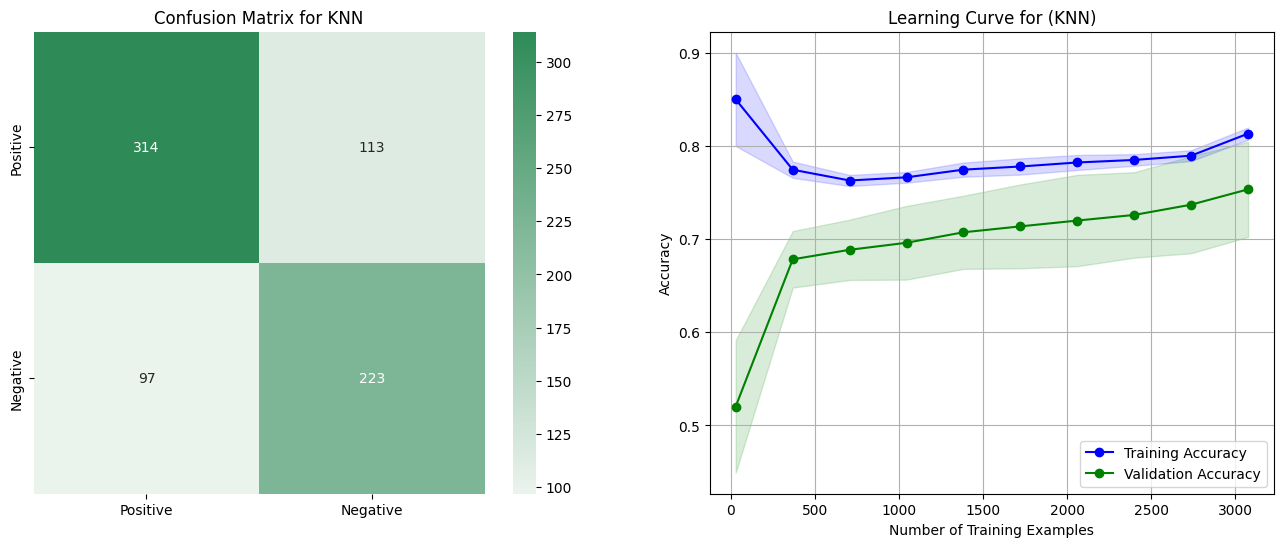

In [ ]:
model_kn = KNeighborsClassifier(n_neighbors=gs_km.best_params_["n_neighbors"],
                                algorithm=gs_km.best_params_["algorithm"],
                                leaf_size=gs_km.best_params_["leaf_size"],
                                p=gs_km.best_params_["p"])



model_kn.fit(X_train_km, y_train_km)

y_pred_kn = model_kn.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test,y_pred_kn)}")
print(f"Precision score: {precision_score(y_test,y_pred_kn)}")
print(f"Recall score: {recall_score(y_test,y_pred_kn)}")
print(f"matt_score: {matthews_corrcoef(y_test,y_pred_kn)}")
matrix_kn = confusion_matrix(y_test,y_pred_kn)

results_models["accuracy"].append(accuracy_score(y_test,y_pred_kn))
results_models["precision"].append(precision_score(y_test,y_pred_kn))
results_models["recall"].append(recall_score(y_test,y_pred_kn))
results_models["f1_score"].append(f1_score(y_test, y_pred_kn, average='macro'))


print(classification_report(y_test,y_pred_kn))

Matrix_Curve(model_kn,X_train_km,y_train_km,str("KNN"),matrix_kn)

In [ ]:
results_models

{'accuracy': [0.6211512717536813, 0.7188755020080321],
 'precision': [0.5352380952380953, 0.6636904761904762],
 'recall': [0.878125, 0.696875],
 'f1_score': [0.6145166437213374, 0.7146406950346353]}

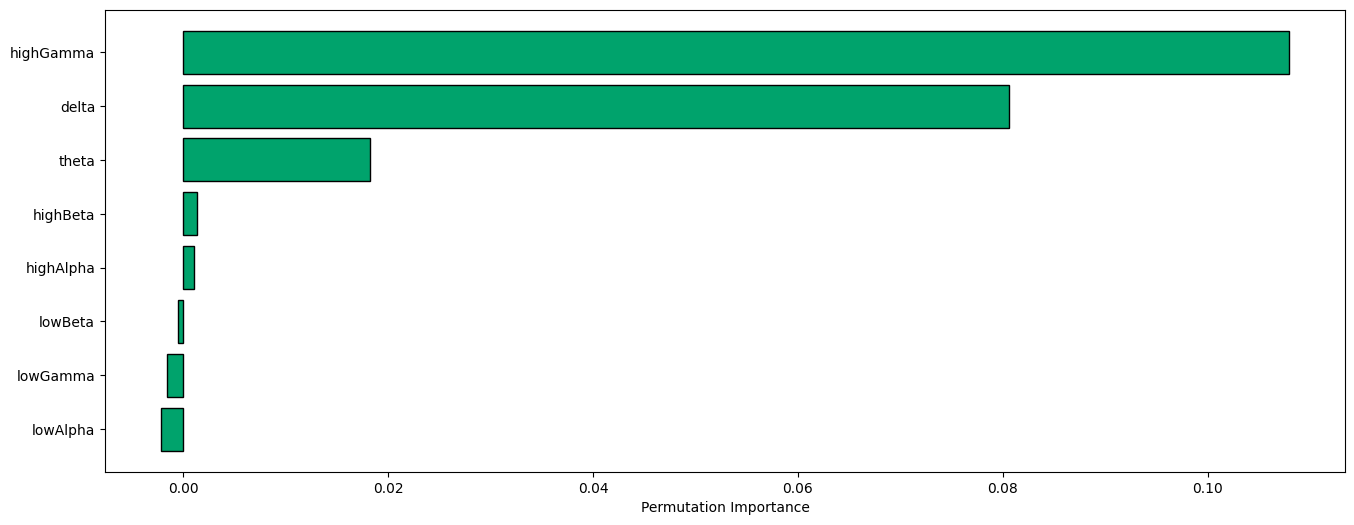

In [ ]:
result = permutation_importance(model_kn, X_test, y_test)

sorted_idx = result.importances_mean.argsort()

plt.barh(range(X_test.shape[1]), result.importances_mean[sorted_idx], color='#00A36C', edgecolor='black')
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.show()

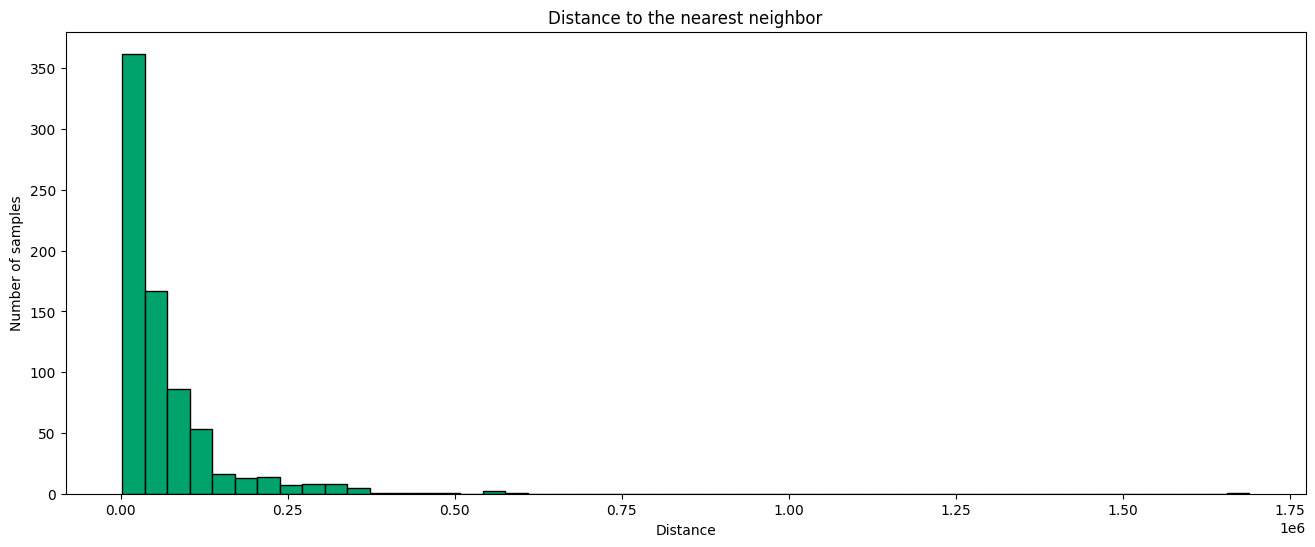

In [ ]:
nn = NearestNeighbors(n_neighbors=2)
nn.fit(X_train_km)
distances, indices = nn.kneighbors(X_test)
nearest_neighbor_distances = distances[:, 1]
plt.hist(nearest_neighbor_distances, bins=50, color='#00A36C', edgecolor='black')
plt.title('Distance to the nearest neighbor')
plt.xlabel('Distance')
plt.ylabel('Number of samples')
plt.show()

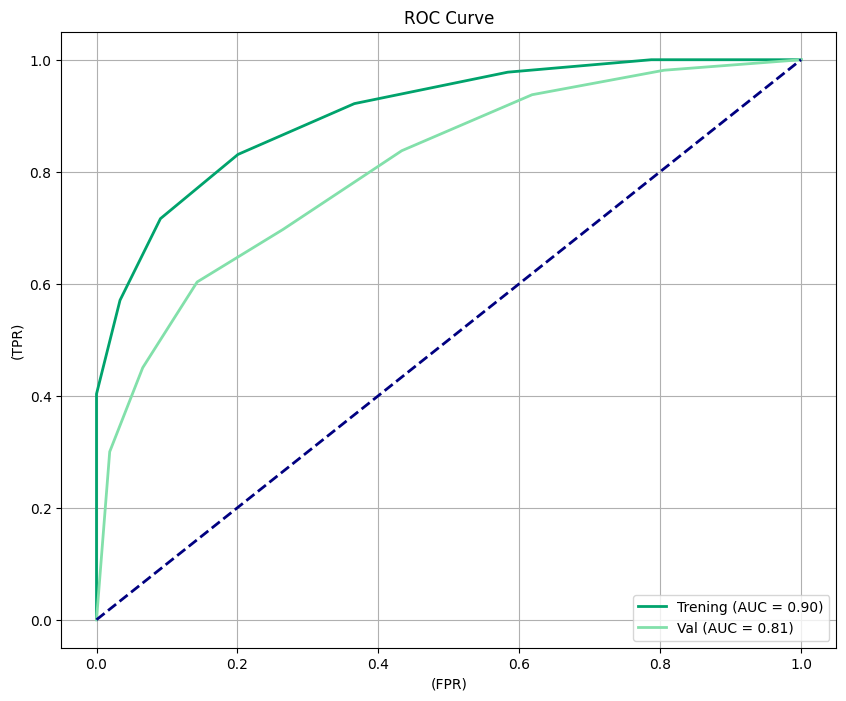

In [ ]:
y_prob_kn_train = model_kn.predict_proba(X_train_km)[:, 1]
pred_val_proba_knn = model_kn.predict_proba(X_test)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train_km, y_prob_kn_train)
fpr_val_knn, tpr_val_knn, _ = roc_curve(y_test, pred_val_proba_knn)
auc_train = roc_auc_score(y_train_km, y_prob_kn_train)
auc_val = roc_auc_score(y_test,pred_val_proba_knn)
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='#00A36C', lw=2, label=f"Trening (AUC = {auc_train:.2f})")
plt.plot(fpr_val_knn, tpr_val_knn,color='#82E0AA', lw=2, label=f"Val (AUC = {auc_val:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('(FPR)')
plt.ylabel('(TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

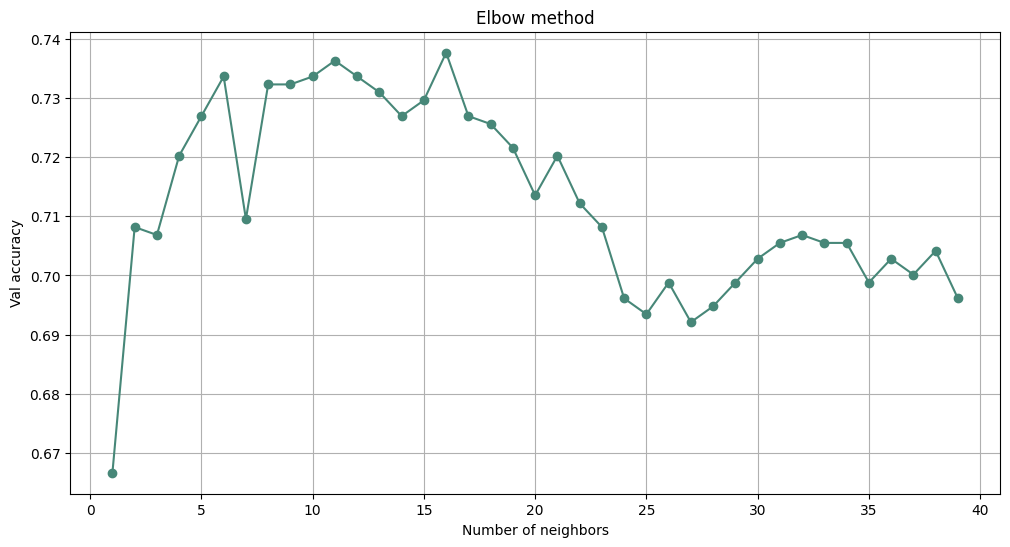

In [ ]:
k_range = range(1, 40)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_km, y_train_km)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(12, 6))
plt.plot(k_range, scores, marker='o', linestyle='-', color='#478778')
plt.xlabel('Number of neighbors')
plt.ylabel('Val accuracy')
plt.title('Elbow method')
plt.grid(True)
plt.show()

In [ ]:
conf_class_kn = Conf_class(y_test,y_pred_kn)

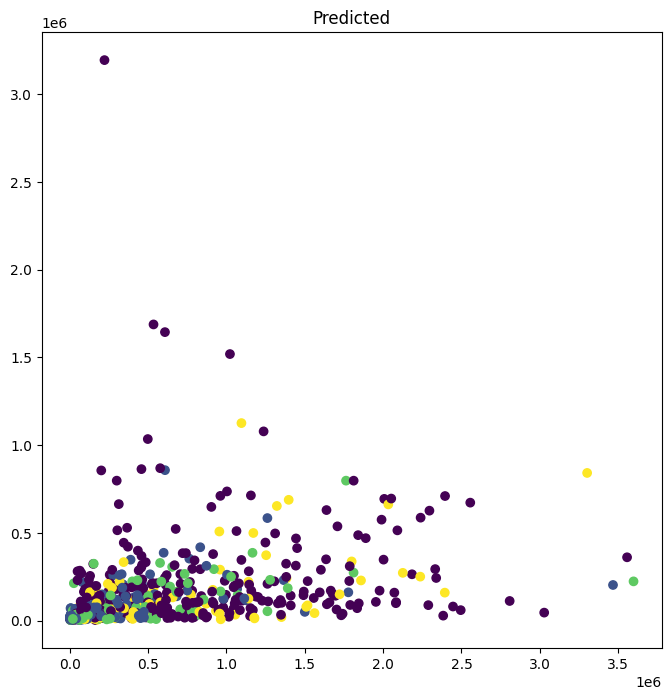

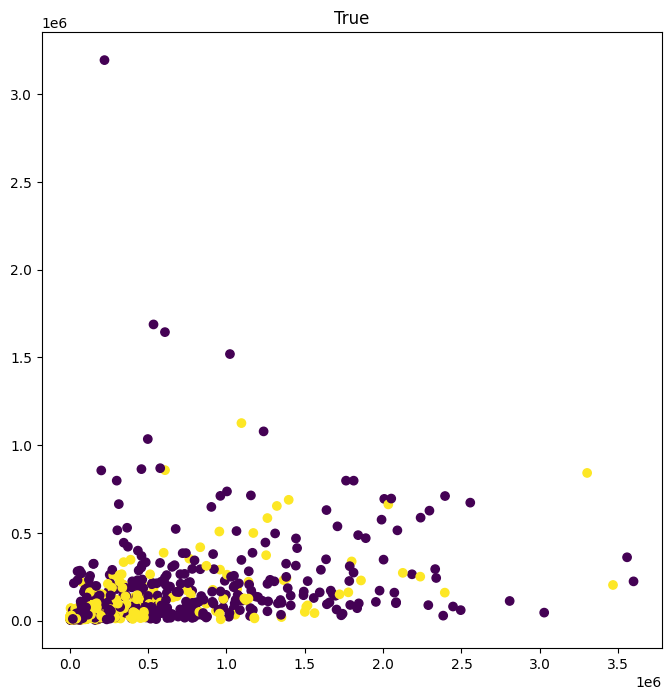

In [ ]:
Feature_2D(X_test,conf_class_kn,0,1,str("Predicted"),str("k"))
Feature_2D(X_test,y_test,0,1,str("True"),str("k"))

# Tree

Accuracy score: 0.6037483266398929
Precision score: 0.5208333333333334
Recall score: 0.9375
matt_score: 0.3428992657869928
              precision    recall  f1-score   support

           0       0.88      0.35      0.51       427
           1       0.52      0.94      0.67       320

    accuracy                           0.60       747
   macro avg       0.70      0.65      0.59       747
weighted avg       0.73      0.60      0.58       747



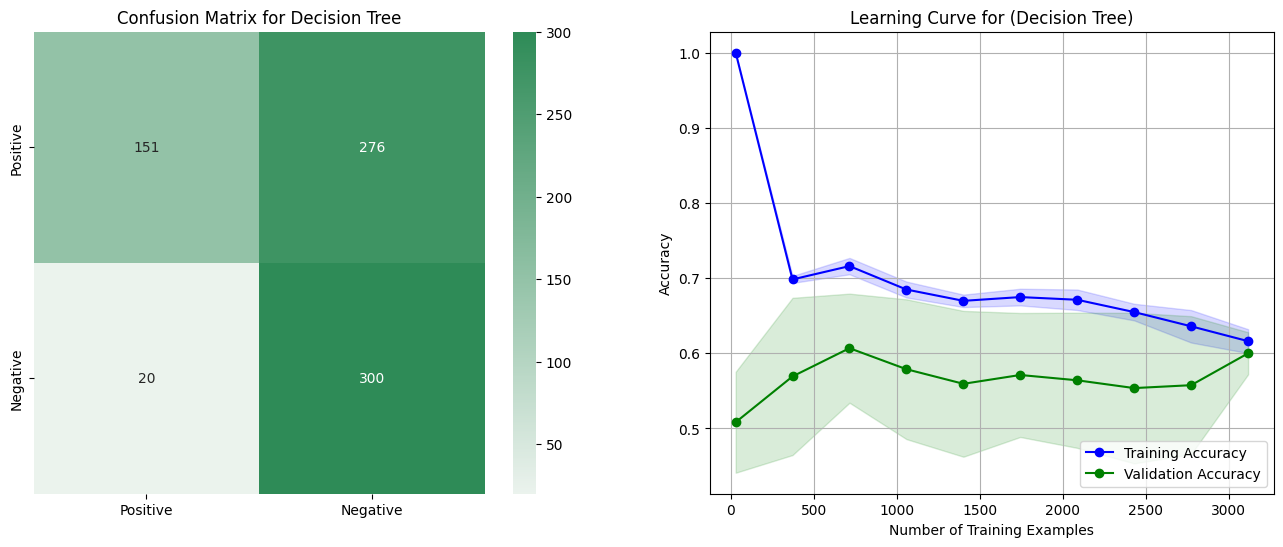

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=3)

model_tree.fit(X_train_ada,y_train_ada)

y_pred_tree = model_tree.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test,y_pred_tree)}")
print(f"Precision score: {precision_score(y_test,y_pred_tree)}")
print(f"Recall score: {recall_score(y_test,y_pred_tree)}")
print(f"matt_score: {matthews_corrcoef(y_test,y_pred_tree)}")
matrix_tree = confusion_matrix(y_test,y_pred_tree)

print(classification_report(y_test,y_pred_tree))

results_models["accuracy"].append(accuracy_score(y_test,y_pred_tree))
results_models["precision"].append(precision_score(y_test,y_pred_tree))
results_models["recall"].append(recall_score(y_test,y_pred_tree))
results_models["f1_score"].append(f1_score(y_test, y_pred_tree, average='macro'))

Matrix_Curve(model_tree,X_train_ada,y_train_ada,str("Decision Tree"),matrix_tree)

[Text(0.5, 0.875, 'x[5] <= 26351.5\ngini = 0.5\nsamples = 3463\nvalue = [1708, 1755]'),
 Text(0.25, 0.625, 'x[7] <= 521291.0\ngini = 0.493\nsamples = 2823\nvalue = [1240, 1583]'),
 Text(0.125, 0.375, 'x[7] <= 268743.0\ngini = 0.499\nsamples = 2559\nvalue = [1213, 1346]'),
 Text(0.0625, 0.125, 'gini = 0.493\nsamples = 2391\nvalue = [1054, 1337]'),
 Text(0.1875, 0.125, 'gini = 0.101\nsamples = 168\nvalue = [159, 9]'),
 Text(0.375, 0.375, 'x[0] <= 483658.0\ngini = 0.184\nsamples = 264\nvalue = [27, 237]'),
 Text(0.3125, 0.125, 'gini = 0.015\nsamples = 132\nvalue = [1, 131]'),
 Text(0.4375, 0.125, 'gini = 0.316\nsamples = 132\nvalue = [26, 106]'),
 Text(0.75, 0.625, 'x[7] <= 116931.5\ngini = 0.393\nsamples = 640\nvalue = [468, 172]'),
 Text(0.625, 0.375, 'x[0] <= 9854.0\ngini = 0.495\nsamples = 228\nvalue = [125, 103]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.6875, 0.125, 'gini = 0.485\nsamples = 213\nvalue = [125, 88]'),
 Text(0.875, 0.375, 'x[4] <= 261

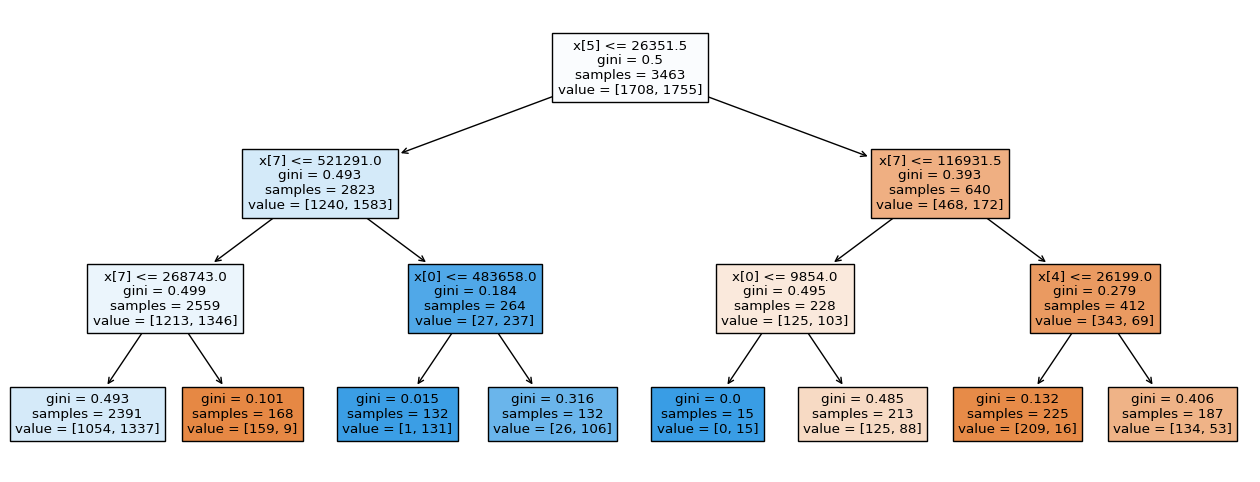

In [ ]:
plot_tree(model_tree,filled=True)

# Random Forest

In [ ]:
params_rf = {"n_estimators": [150,250],
          "criterion": ["gini","entropy"],
          "max_depth": [25,35],
          "min_samples_split": [5,15],
          "min_samples_leaf": [5,15]}

gs_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                  param_grid=params_rf,
                  cv=10,
                  scoring="f1_macro")

gs_rf.fit(X_train_ada,y_train_ada)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 35], 'min_samples_leaf': [5, 15],
                         'min_samples_split': [5, 15],
                         'n_estimators': [150, 250]},
             scoring='f1_macro')

In [ ]:
gs_rf.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 150}

Accuracy score: 0.7389558232931727
Precision score: 0.6666666666666666
Recall score: 0.78125
matt_score: 0.48347635535796823
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       427
           1       0.67      0.78      0.72       320

    accuracy                           0.74       747
   macro avg       0.74      0.74      0.74       747
weighted avg       0.75      0.74      0.74       747



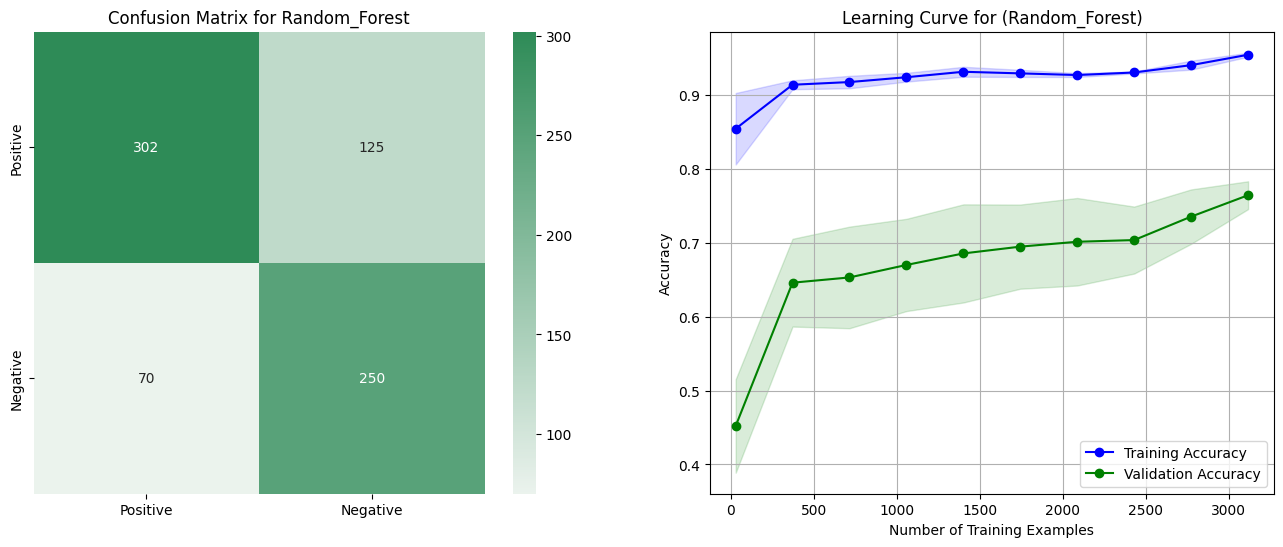

In [ ]:
model_rf = RandomForestClassifier(criterion=gs_rf.best_params_['criterion'],
                                  max_depth=gs_rf.best_params_['max_depth'],
                                  min_samples_leaf=gs_rf.best_params_['min_samples_leaf'],
                                  min_samples_split=gs_rf.best_params_['min_samples_split'],
                                  n_estimators=gs_rf.best_params_['n_estimators'],
                                  random_state=42)

model_rf.fit(X_train_ada, y_train_ada)

y_pred_rf = model_rf.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test,y_pred_rf)}")
print(f"Precision score: {precision_score(y_test,y_pred_rf)}")
print(f"Recall score: {recall_score(y_test,y_pred_rf)}")
print(f"matt_score: {matthews_corrcoef(y_test,y_pred_rf)}")
matrix_rf = confusion_matrix(y_test,y_pred_rf)

print(classification_report(y_test,y_pred_rf))

results_models["accuracy"].append(accuracy_score(y_test,y_pred_rf))
results_models["precision"].append(precision_score(y_test,y_pred_rf))
results_models["recall"].append(recall_score(y_test,y_pred_rf))
results_models["f1_score"].append(f1_score(y_test, y_pred_rf, average='macro'))

Matrix_Curve(model_rf,X_train_ada,y_train_ada,str("Random_Forest"),matrix_rf)

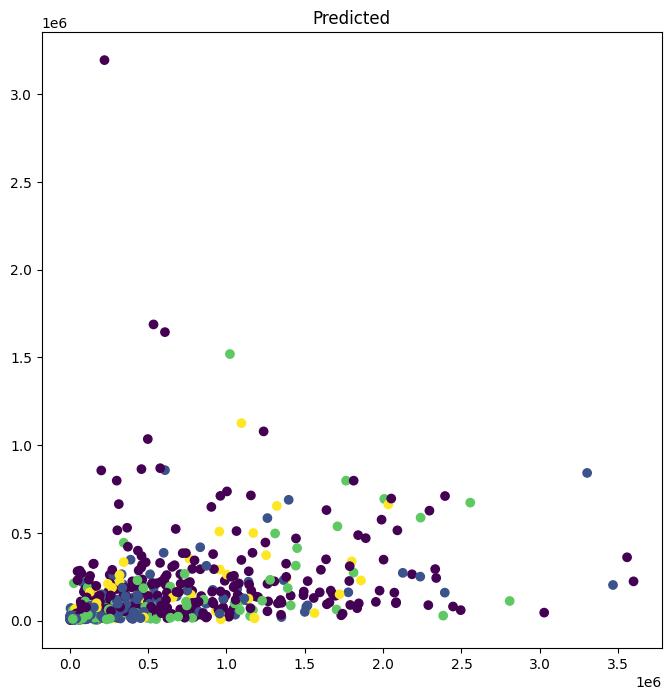

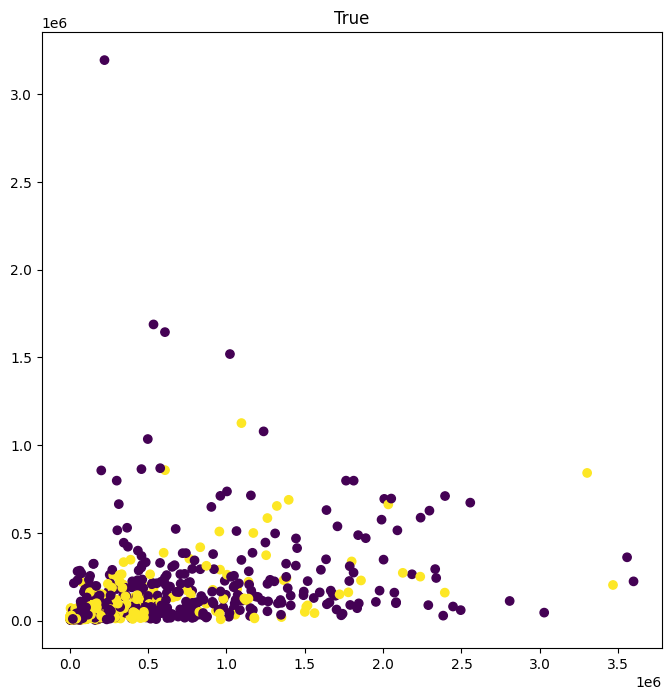

In [ ]:
conf_class_rf = Conf_class(y_test,y_pred_rf)
Feature_2D(X_test,conf_class_rf,0,1,str("Predicted"),str("k"))
Feature_2D(X_test,y_test,0,1,str("True"),str("k"))

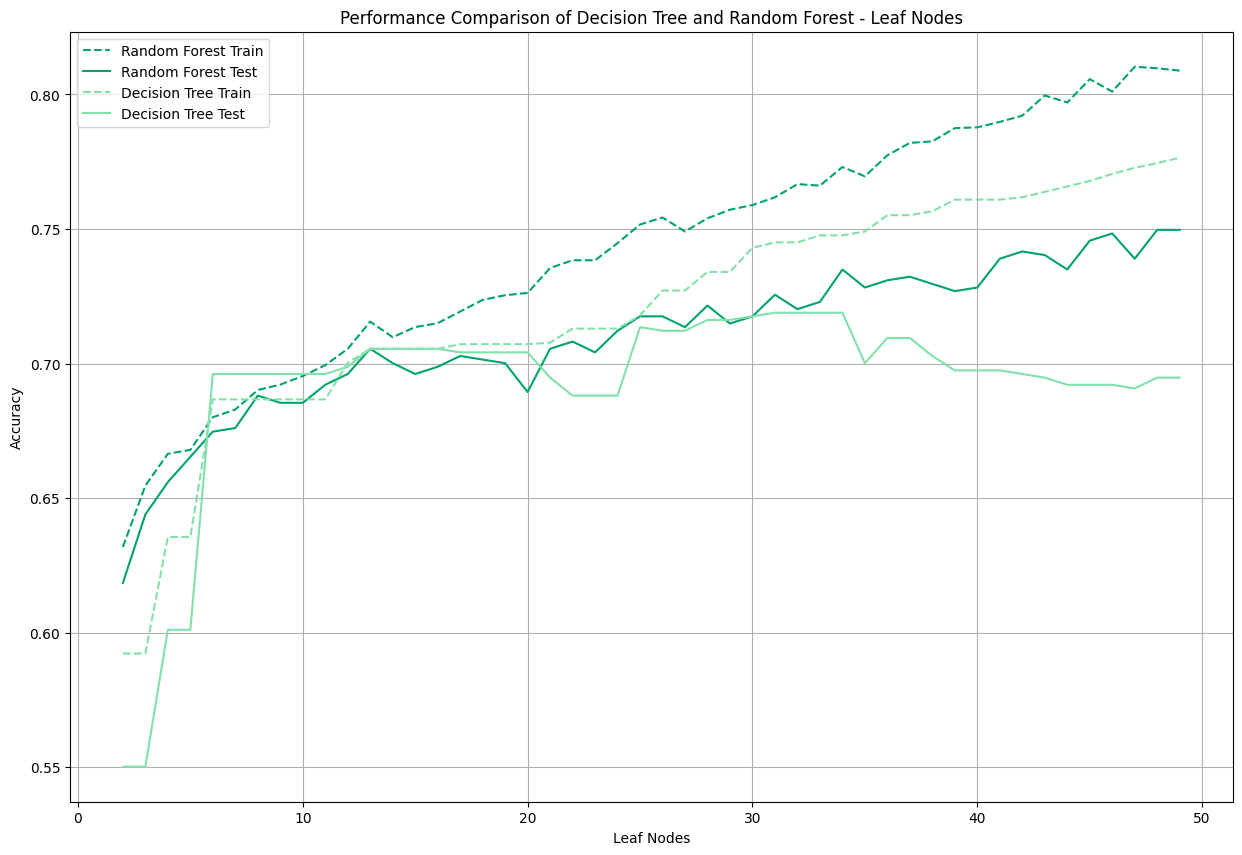

In [ ]:
tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2, 50, 1):
    tree_1_classifier = DecisionTreeClassifier(max_leaf_nodes=i,
                                               criterion='entropy',
                                               max_depth=25).fit(X_train_ada, y_train_ada)
    tree_train_scores.append(tree_1_classifier.score(X_train_ada, y_train_ada))
    tree_test_scores.append(tree_1_classifier.score(X_test, y_test))

    rf_1_classifier = RandomForestClassifier(max_leaf_nodes=i,
                                             criterion='entropy',
                                             max_depth=25,
                                             n_estimators=250).fit(X_train_ada, y_train_ada)
    rf_train_scores.append(rf_1_classifier.score(X_train_ada, y_train_ada))
    rf_test_scores.append(rf_1_classifier.score(X_test, y_test))

plt.figure(figsize=(15, 10))
plt.xlabel('Leaf Nodes')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Decision Tree and Random Forest - Leaf Nodes')

plt.plot(range(2, 50, 1), rf_train_scores, color='#00A36C', linestyle='--', label='Random Forest Train')
plt.plot(range(2, 50, 1), rf_test_scores, color='#00A36C', label='Random Forest Test')
plt.plot(range(2, 50, 1), tree_train_scores, color='#82E0AA', linestyle='--', label='Decision Tree Train')
plt.plot(range(2, 50, 1), tree_test_scores, color='#82E0AA', label='Decision Tree Test')

plt.legend(loc='best')
plt.grid(True)
plt.show()

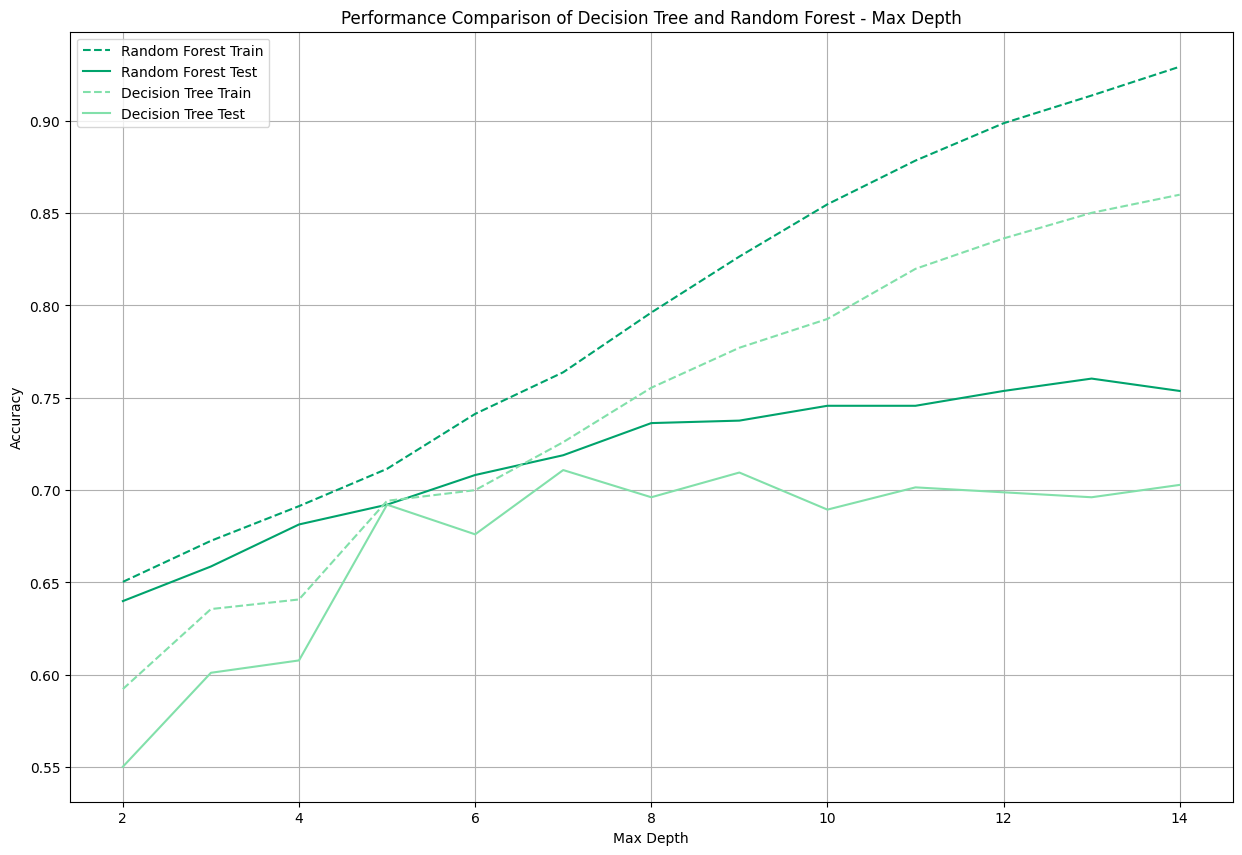

In [ ]:
tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2, 15, 1):
    tree_1_classifier = DecisionTreeClassifier(max_depth=i,
                                               criterion="entropy",
                                               min_samples_split=5,
                                               min_samples_leaf=5).fit(X_train_ada, y_train_ada)
    tree_train_scores.append(tree_1_classifier.score(X_train_ada, y_train_ada))
    tree_test_scores.append(tree_1_classifier.score(X_test, y_test))

    rf_1_classifier = RandomForestClassifier(max_depth=i,
                                             criterion="entropy",
                                             min_samples_split=5,
                                             min_samples_leaf=5,
                                             n_estimators=250).fit(X_train_ada, y_train_ada)
    rf_train_scores.append(rf_1_classifier.score(X_train_ada, y_train_ada))
    rf_test_scores.append(rf_1_classifier.score(X_test, y_test))

plt.figure(figsize=(15, 10))
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Decision Tree and Random Forest - Max Depth')

plt.plot(range(2, 15, 1), rf_train_scores, color='#00A36C', linestyle='--', label='Random Forest Train')
plt.plot(range(2, 15, 1), rf_test_scores, color='#00A36C', label='Random Forest Test')
plt.plot(range(2, 15, 1), tree_train_scores, color='#82E0AA', linestyle='--', label='Decision Tree Train')
plt.plot(range(2, 15, 1), tree_test_scores, color='#82E0AA', label='Decision Tree Test')

plt.legend(loc='best')
plt.grid(True)
plt.show()

AUC for the training set: 0.9930896668601588
AUC for the test set: 0.8554888758782202


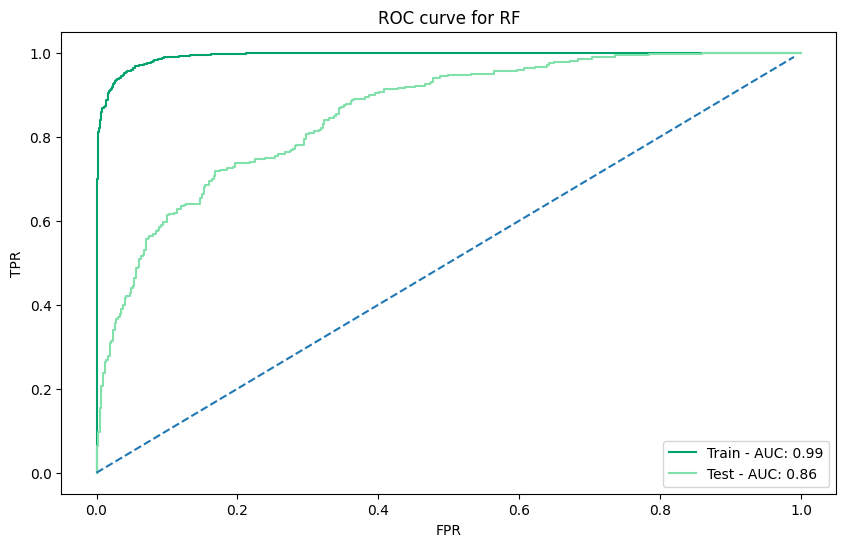

In [ ]:
pred_train_proba = model_rf.predict_proba(X_train_ada)[:,1]
pred_test_proba = model_rf.predict_proba(X_test)[:,1]

roc_auc_train = roc_auc_score(y_train_ada, pred_train_proba)
roc_auc_test = roc_auc_score(y_test, pred_test_proba)
print(f"AUC for the training set: {roc_auc_train}")
print(f"AUC for the test set: {roc_auc_test}")

fpr_train, tpr_train, _ = roc_curve(y_train_ada, pred_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, pred_test_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train - AUC: {roc_auc_train:.2f}',color='#00A36C')
plt.plot(fpr_test, tpr_test, label=f'Test - AUC: {roc_auc_test:.2f}',color='#82E0AA')
plt.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01), '--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for RF')
plt.legend()
plt.show()



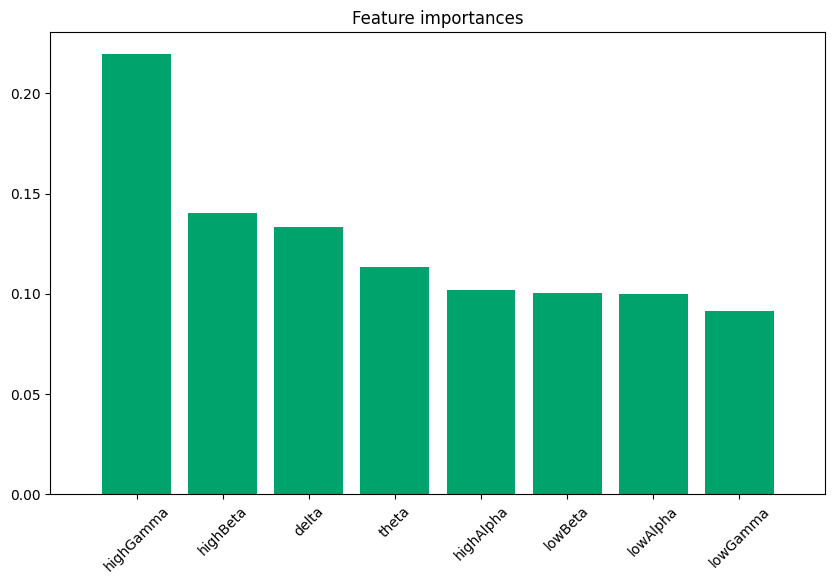

In [ ]:
feature_names = ['delta', 'theta', 'lowAlpha',
                 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma', 'highGamma']

importances = model_rf.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(len(feature_names)), importances[indices],
       color="#00A36C", align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
plt.xlim([-1, len(feature_names)])
plt.show()

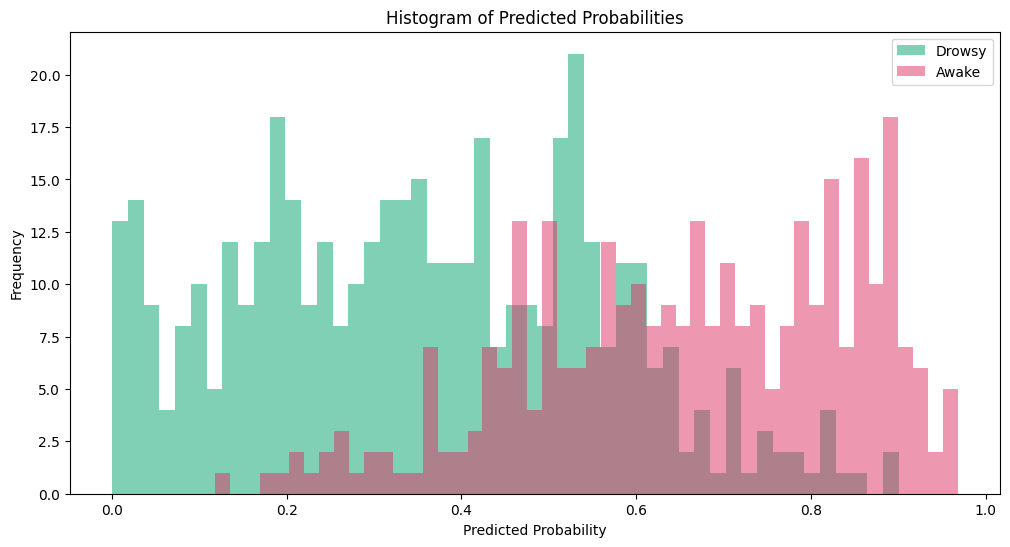

In [ ]:
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]


plt.figure(figsize=(12, 6))
plt.hist(y_pred_proba[y_test == 0], bins=50, label='Drowsy', alpha=0.5, color='#00A36C')
plt.hist(y_pred_proba[y_test == 1], bins=50, label='Awake', alpha=0.5, color='#DE3163')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend(loc='upper right')
plt.show()

In [ ]:
results_models = pd.DataFrame(results_models)
results_models

accuracy  precision    recall  f1_score
0  0.621151   0.535238  0.878125  0.614517
1  0.718876   0.663690  0.696875  0.714641
2  0.603748   0.520833  0.937500  0.587330
3  0.738956   0.666667  0.781250  0.737685

Text(0, 0.5, 'f1_score')

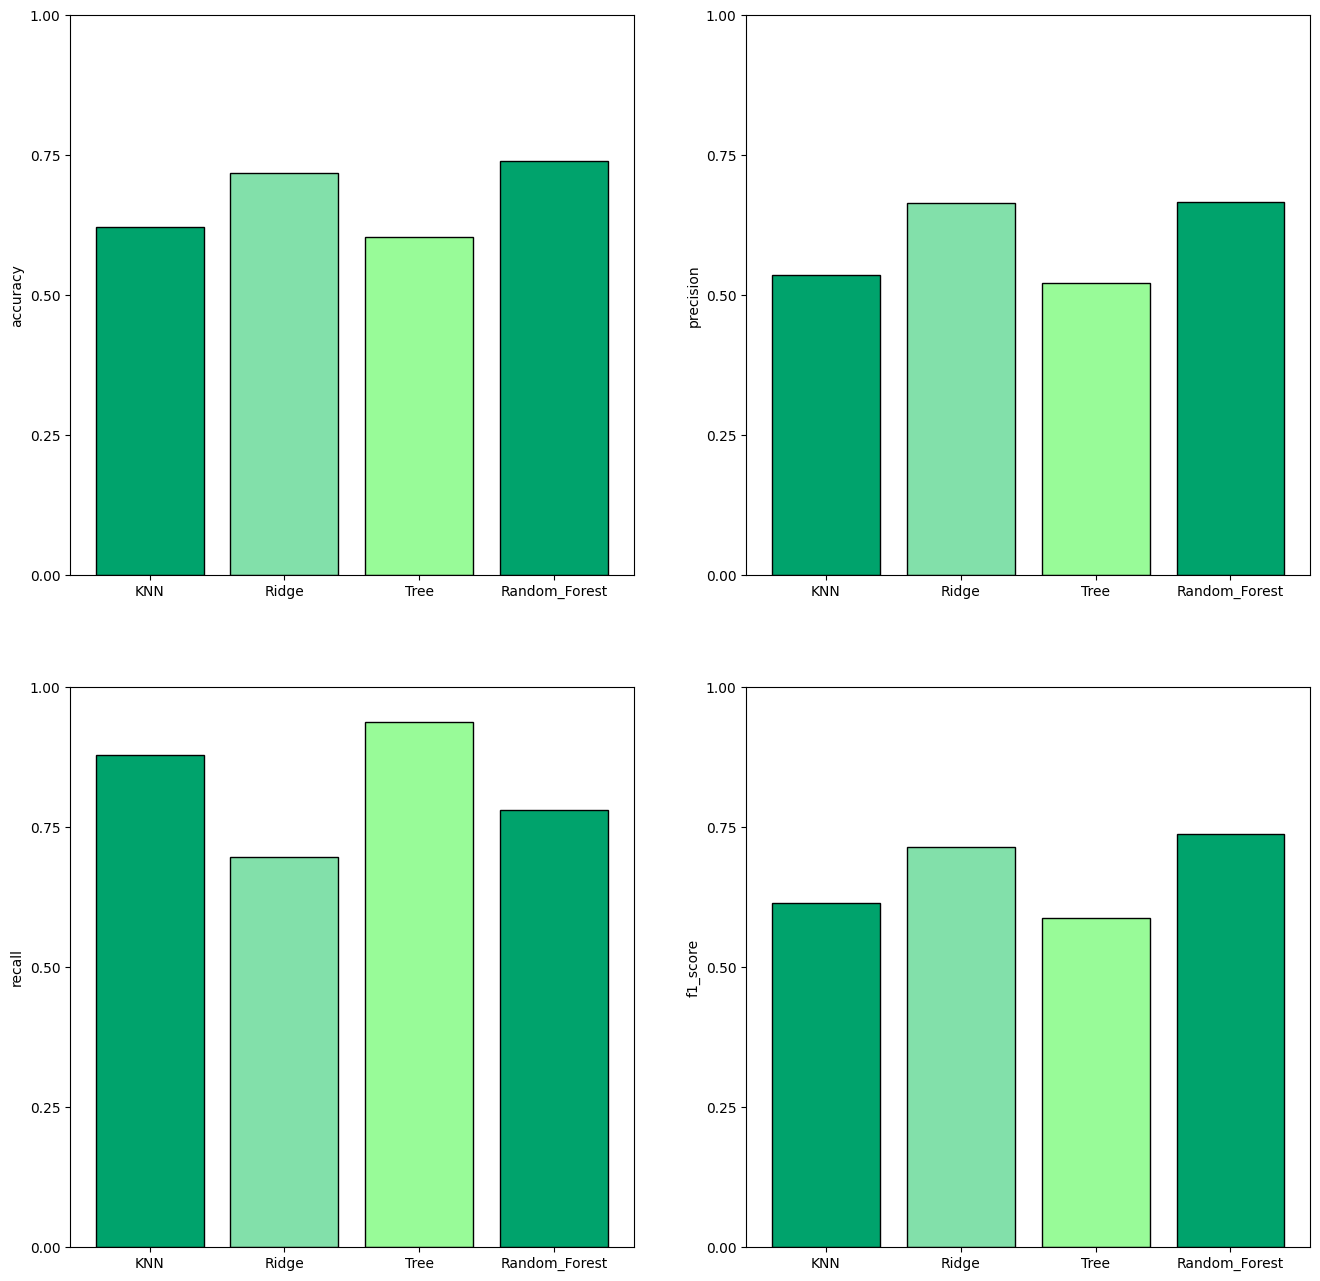

In [ ]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(16,16))

models = ['KNN','Ridge','Tree','Random_Forest']

ax1.bar(models,results_models['accuracy'],color=['#00A36C','#82E0AA','#98FB98'], edgecolor='black')
ax1.set_yticks([0,0.25,0.5,0.75,1])
ax1.set_ylabel("accuracy")
ax2.bar(models,results_models['precision'],color=['#00A36C','#82E0AA','#98FB98'], edgecolor='black')
ax2.set_yticks([0,0.25,0.5,0.75,1])
ax2.set_ylabel("precision")
ax3.bar(models,results_models['recall'],color=['#00A36C','#82E0AA','#98FB98'], edgecolor='black')
ax3.set_yticks([0,0.25,0.5,0.75,1])
ax3.set_ylabel("recall")
ax4.bar(models,results_models['f1_score'],color=['#00A36C','#82E0AA','#98FB98'], edgecolor='black')
ax4.set_yticks([0,0.25,0.5,0.75,1])
ax4.set_ylabel("f1_score")